In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib inline

In [2]:
nyt_df = pd.read_csv("../../data/nyt/covid-19-data-master/us-counties.csv")

In [3]:
nyt_df.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [79]:
abrvs = pd.read_table("../../../COVID datascience/State Abbreviations Code Table.tsv")

In [80]:
nyt_df.join()

Code                  Description
0    AA  Armed Forces (the) Americas
1    AB                      Alberta
2    AE          Armed Forces Europe
3    AK                       Alaska
4    AL                      Alabama
..  ...                          ...
71   WA                   Washington
72   WI                    Wisconsin
73   WV                West Virginia
74   WY                      Wyoming
75   YT                        Yukon

[76 rows x 2 columns]

In [4]:
all_county_pop_df = pd.read_csv("../../data/Demographics/all_county_pop.csv",encoding='latin-1')

all_county_pop_df = all_county_pop_df[["STNAME","CTYNAME","POPESTIMATE2019"]]
counties = list(all_county_pop_df["CTYNAME"])
counties = [x.split(" ")[0] for x in counties]
all_county_pop_df["CTYNAME"] = counties
# add fip



In [5]:
combined_df = pd.merge(nyt_df, all_county_pop_df,  how='left', left_on=['state','county'], right_on = ['STNAME','CTYNAME'])
combined_df = combined_df.drop(['STNAME', 'CTYNAME'], axis=1) 

In [6]:
combined_df.head()

date     county       state     fips  cases  deaths  POPESTIMATE2019
0  2020-01-21  Snohomish  Washington  53061.0      1       0         822083.0
1  2020-01-22  Snohomish  Washington  53061.0      1       0         822083.0
2  2020-01-23  Snohomish  Washington  53061.0      1       0         822083.0
3  2020-01-24       Cook    Illinois  17031.0      1       0        5150233.0
4  2020-01-24  Snohomish  Washington  53061.0      1       0         822083.0

In [7]:

ids = list(set(combined_df["fips"]))
ids = [x for x in ids if str(x) != "nan"]

In [8]:
len(ids)

2347

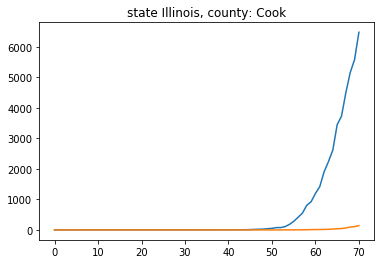

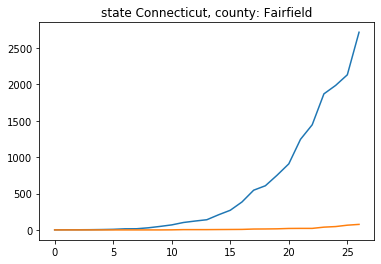

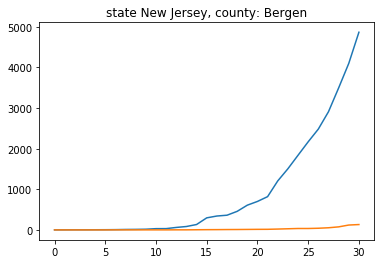

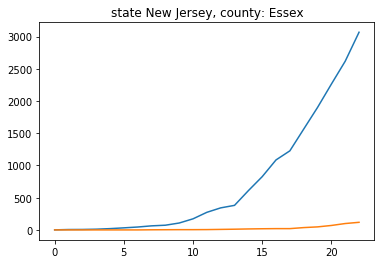

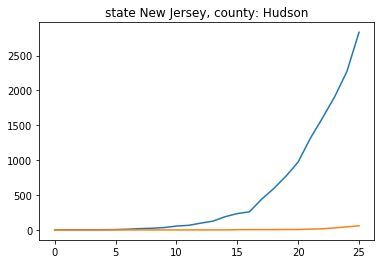

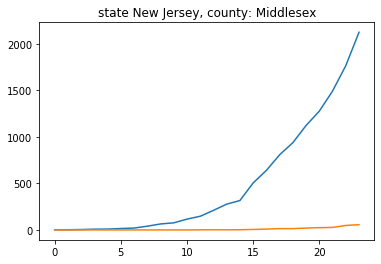

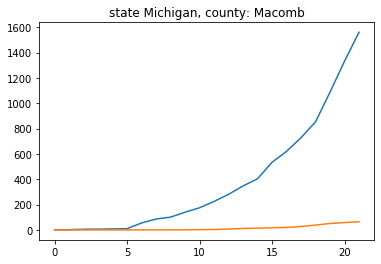

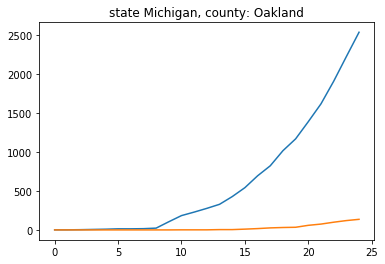

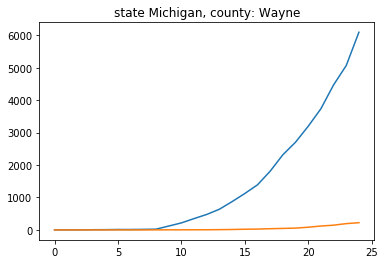

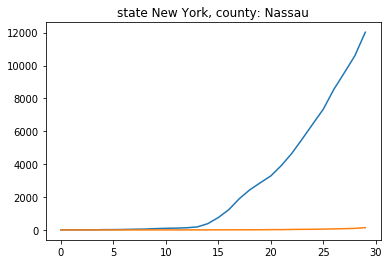

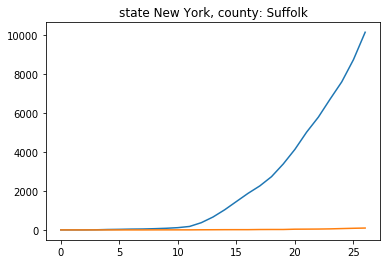

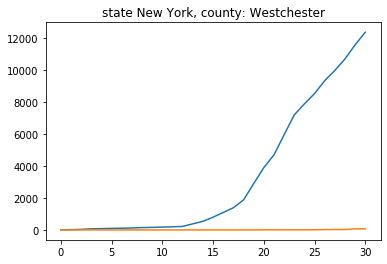

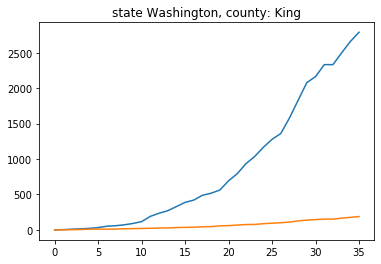

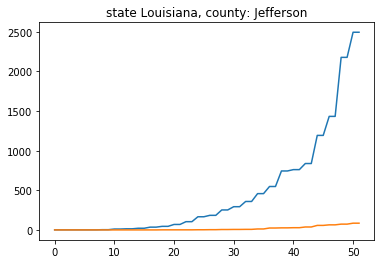

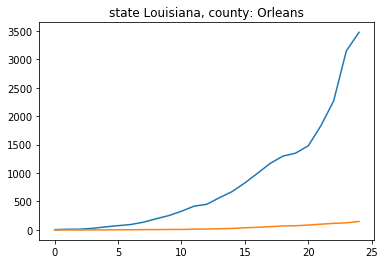

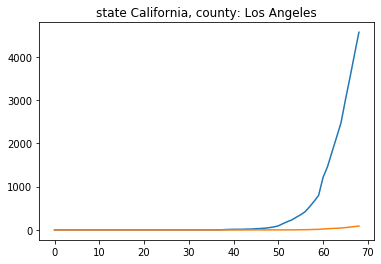

In [9]:
ct = 0
temp = None
for cnty_id in ids:
    data = combined_df[combined_df["fips"]==cnty_id]
    
    
    county = list(data["county"])[-1]
    state = list(data["state"])[-1]
    case_data = list(data["cases"])
    death_data = list(data["deaths"])
    try:
        if case_data[-1] > 100  and death_data[-1] > 50:
            temp = case_data
            ct+=1
            plt.title("state {}, county: {}".format(state,county))
            plt.plot(case_data)
            plt.plot(death_data)
            plt.show()
    except:
        continue


In [59]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

State: Oregon, county: Benton, slope: 0.0, rval: 0.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


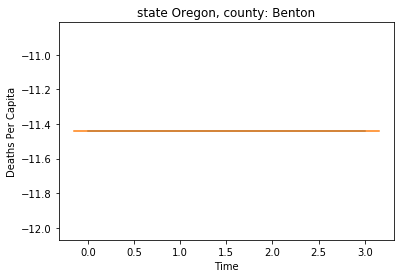

State: Oregon, county: Linn, slope: 0.07617001984175205, rval: 0.8451542547285165


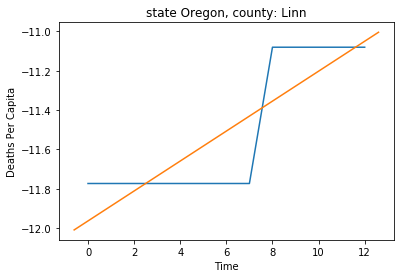

State: Oregon, county: Marion, slope: 0.11888479593501634, rval: 0.9209702383617371


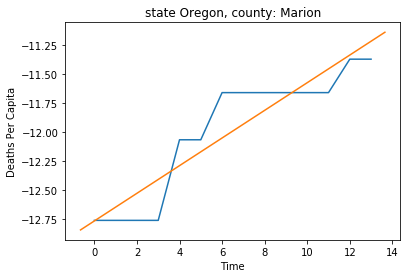

State: Oregon, county: Polk, slope: nan, rval: 0.0


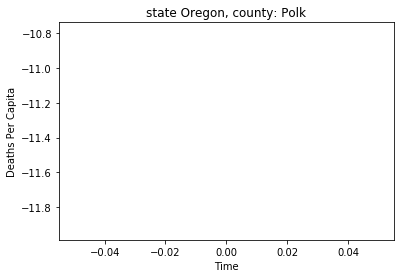

State: Oregon, county: Yamhill, slope: 0.21066166255174, rval: 0.8783598890477653


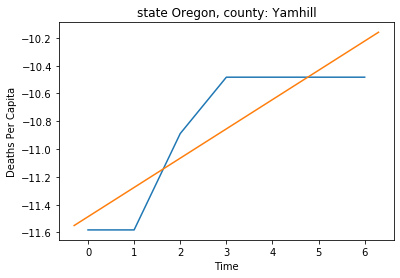

State: New Hampshire, county: Hillsborough, slope: 0.12555627203324274, rval: 0.9053344583729047


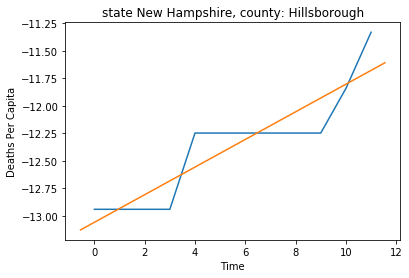

State: New Hampshire, county: Sullivan, slope: 0.0, rval: 0.0


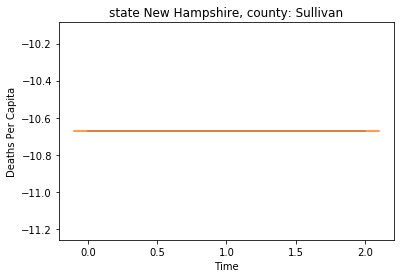

State: Massachusetts, county: Barnstable, slope: 0.1566269502076974, rval: 0.905332879929351


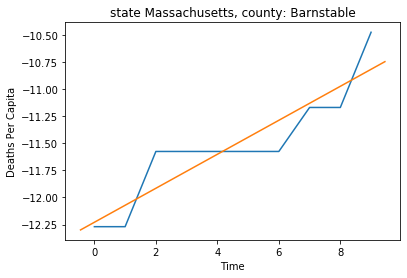

State: Massachusetts, county: Berkshire, slope: 0.17115946524916348, rval: 0.9531930120356769


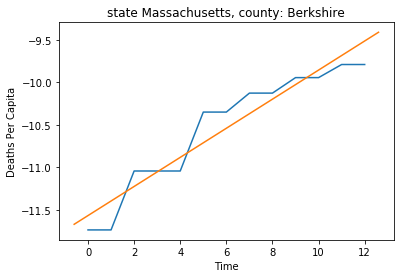

State: Massachusetts, county: Essex, slope: 0.34881460454883, rval: 0.9833151245375162


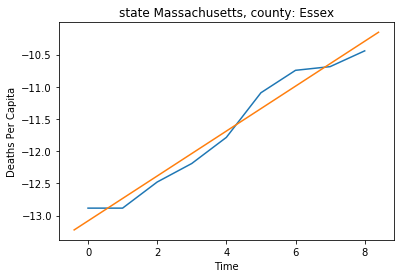

State: Massachusetts, county: Franklin, slope: 0.28248562153506396, rval: 0.9539058333821426


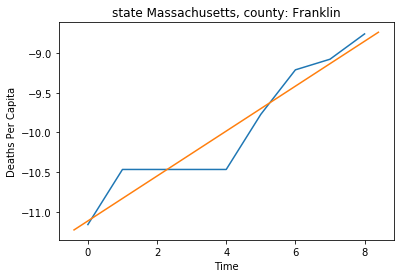

State: Massachusetts, county: Hampden, slope: 0.3181023533579803, rval: 0.978288324234401


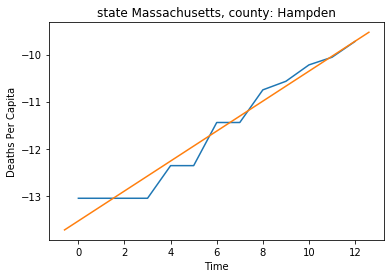

State: Massachusetts, county: Hampshire, slope: 0.6931471805599454, rval: 1.0


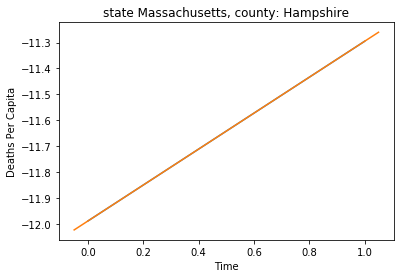

State: Massachusetts, county: Middlesex, slope: 0.29885194110801305, rval: 0.9862395814013504


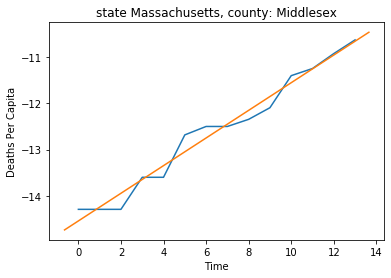

State: Massachusetts, county: Norfolk, slope: 0.3088807319553271, rval: 0.9310390349068274


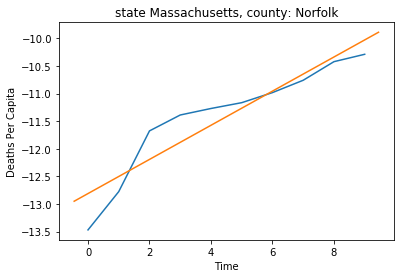

State: Massachusetts, county: Plymouth, slope: 0.3940610462280059, rval: 0.9056876722024634


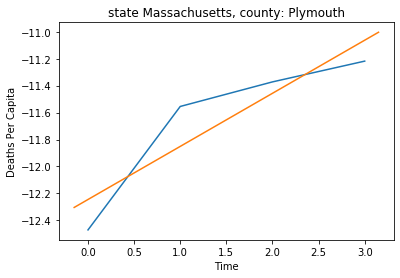

State: Massachusetts, county: Suffolk, slope: 0.21186466690595068, rval: 0.9666187886479685


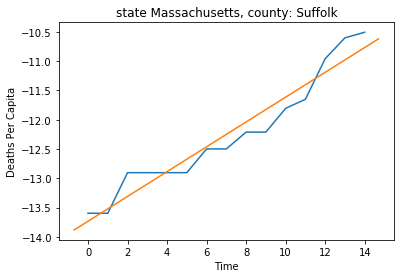

State: Massachusetts, county: Worcester, slope: 0.20775775137124844, rval: 0.981174508481187


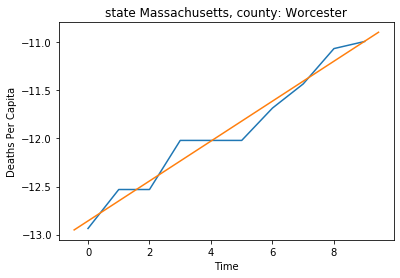

State: Illinois, county: Christian, slope: 0.6931471805599454, rval: 1.0


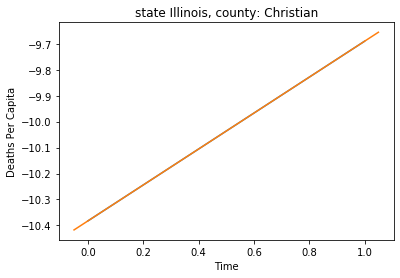

State: Illinois, county: Cook, slope: 0.2888951604878807, rval: 0.9933072986524089


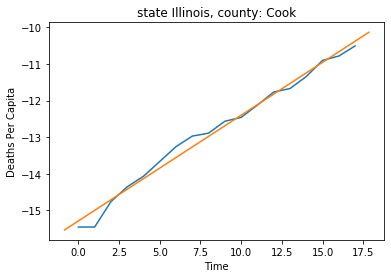

State: Illinois, county: DuPage, slope: 0.3016656927182519, rval: 0.9198610279685983


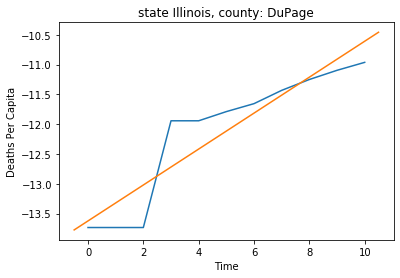

State: Illinois, county: Kane, slope: 0.2602510979223669, rval: 0.9021753534519268


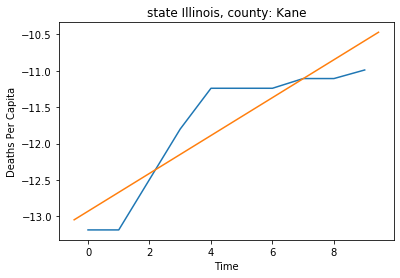

State: Illinois, county: Kankakee, slope: 0.4054651081081655, rval: 1.0


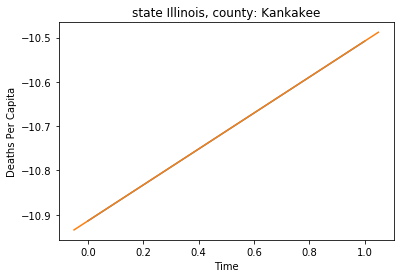

State: Illinois, county: Kendall, slope: 0.0990210257942779, rval: 0.6546536707079772


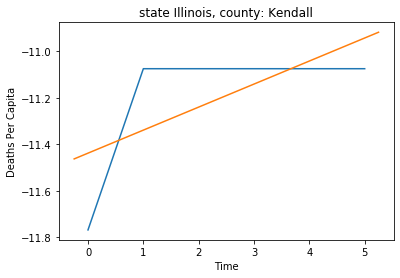

State: Illinois, county: Lake, slope: 0.270994663138653, rval: 0.9626631676906442


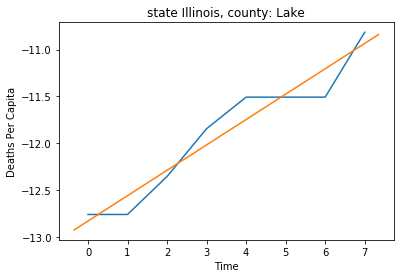

State: Illinois, county: McLean, slope: 0.06855301785757702, rval: 0.8017837257372732


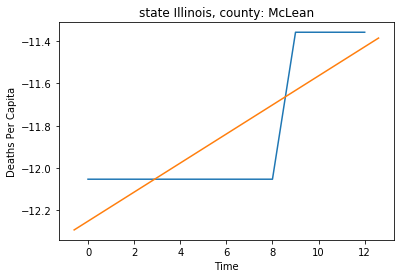

State: Illinois, county: Sangamon, slope: 0.05606337489823088, rval: 0.8043996665398437


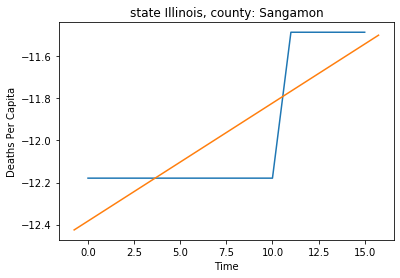

State: Connecticut, county: Fairfield, slope: 0.22523155170569498, rval: 0.9772621263914788


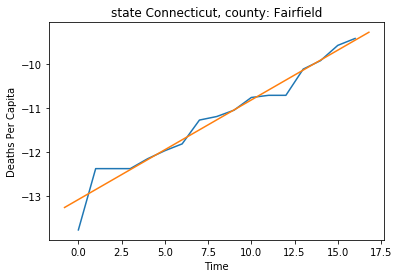

State: Connecticut, county: Hartford, slope: 0.2092827083656103, rval: 0.8946830749551924


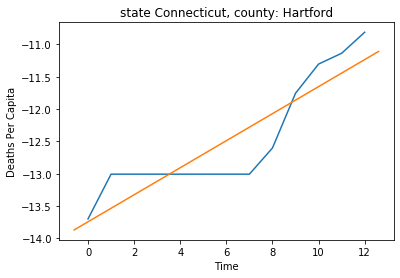

State: Illinois, county: Whiteside, slope: 0.0, rval: 0.0


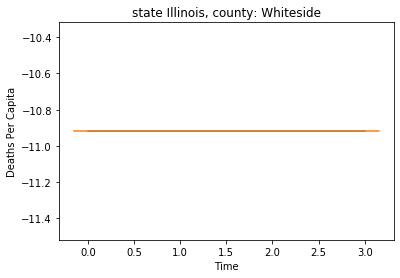

State: Connecticut, county: Litchfield, slope: 0.3465735902799727, rval: 0.8838834764831844


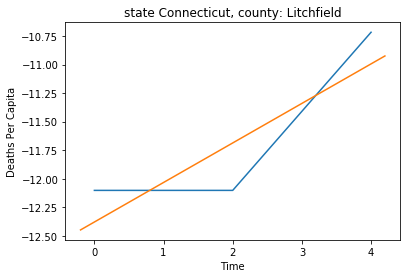

State: Illinois, county: Will, slope: 0.18755936729113848, rval: 0.968013060947594


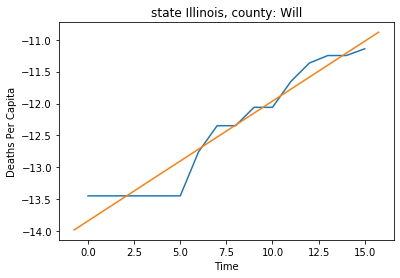

State: Connecticut, county: Middlesex, slope: 0.12424533248940009, rval: 0.7906153579556668


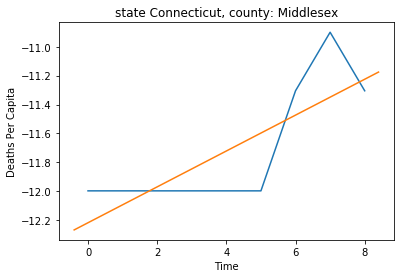

State: Connecticut, county: Tolland, slope: 0.14820332667457684, rval: 0.9573619710614016


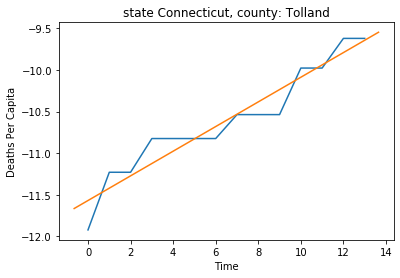

State: Vermont, county: Chittenden, slope: 0.15809642375541658, rval: 0.8401680504168056


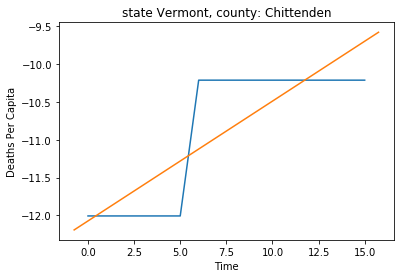

State: Vermont, county: Windsor, slope: 0.0, rval: 0.0


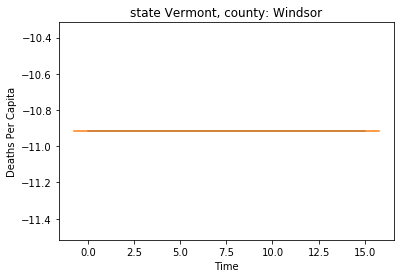

State: Alabama, county: Chambers, slope: 0.22991970177629995, rval: 0.7278776080513183


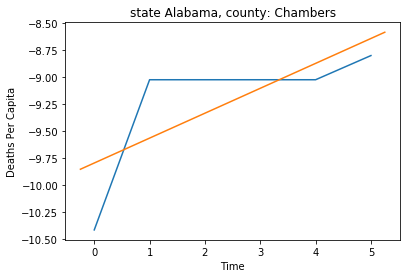

State: Alabama, county: Cullman, slope: 0.0, rval: 0.0


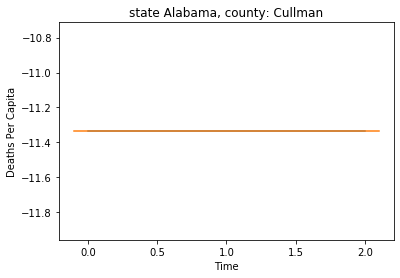

State: Pennsylvania, county: Beaver, slope: 0.20794415416798362, rval: 0.7745966692414834


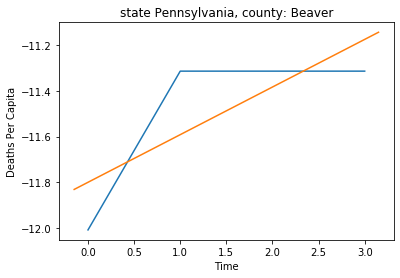

State: Pennsylvania, county: Bucks, slope: 0.2970630773828337, rval: 0.8985123667930136


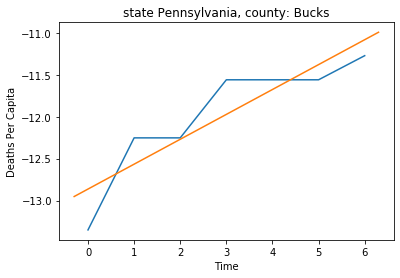

State: Pennsylvania, county: Butler, slope: 0.08086717106532697, rval: 0.724568837309472


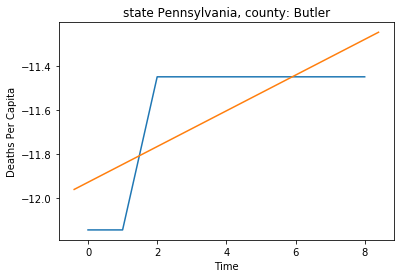

State: Pennsylvania, county: Carbon, slope: 0.0, rval: 0.0


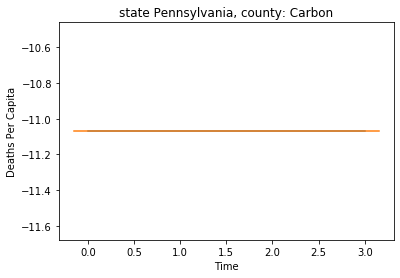

State: Alabama, county: Jackson, slope: 0.0, rval: 0.0


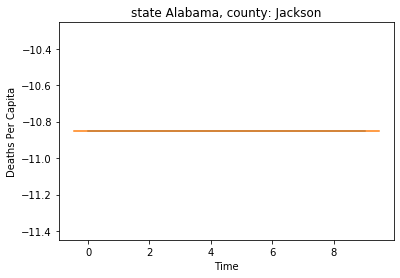

State: Alabama, county: Lauderdale, slope: 0.08086717106532697, rval: 0.7245688373094719


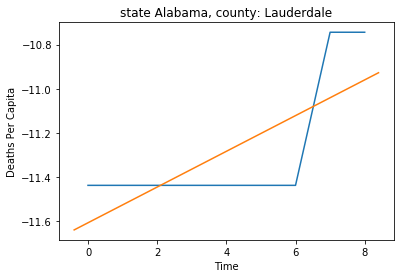

State: Alabama, county: Lee, slope: 0.12163953243244913, rval: 0.8660254037844387


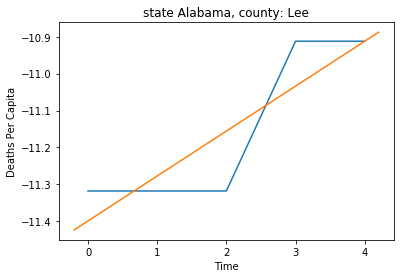

State: Pennsylvania, county: Delaware, slope: 0.2279587469165062, rval: 0.9164807303429148


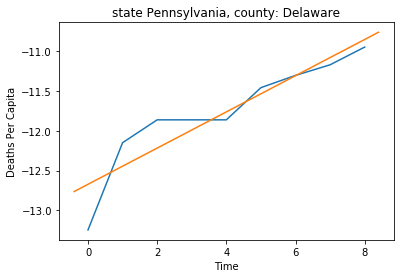

State: Alabama, county: Marion, slope: 0.0, rval: 0.0


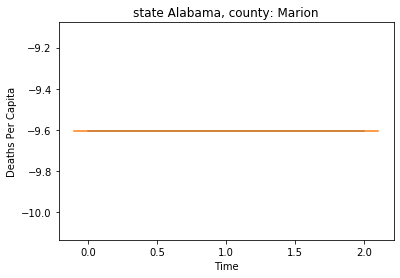

State: Alabama, county: Mobile, slope: 0.2558735006981249, rval: 0.8711243952196668


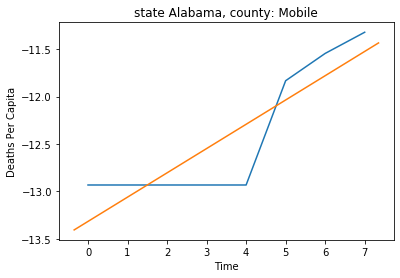

State: Pennsylvania, county: Lackawanna, slope: 0.10490325128541882, rval: 0.9072803614088373


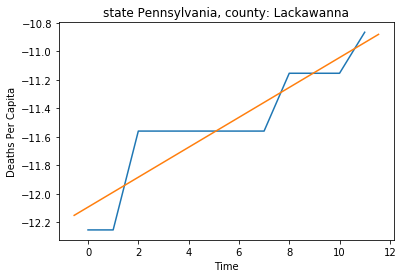

State: Alabama, county: Shelby, slope: 0.20794415416798362, rval: 0.9419083784231796


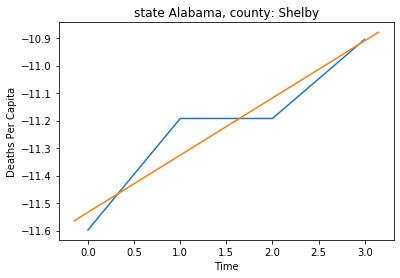

State: Pennsylvania, county: Lehigh, slope: 0.17493261942237723, rval: 0.9082376505112991


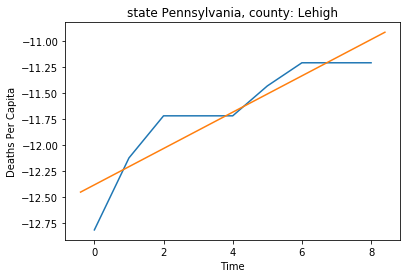

State: Pennsylvania, county: Luzerne, slope: 0.19213120697898983, rval: 0.9658643534334304


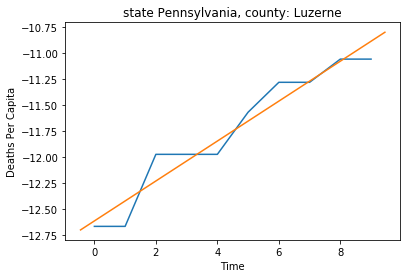

State: Alabama, county: Tallapoosa, slope: 0.0, rval: 0.0


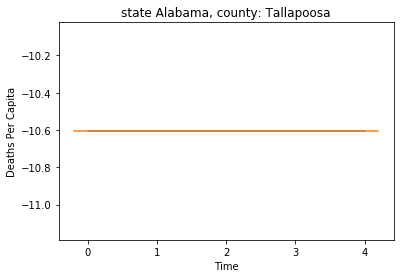

State: Pennsylvania, county: Monroe, slope: 0.24837538988710103, rval: 0.9695867161329728


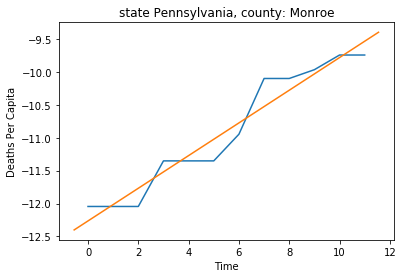

State: Alabama, county: Washington, slope: 0.0, rval: 0.0


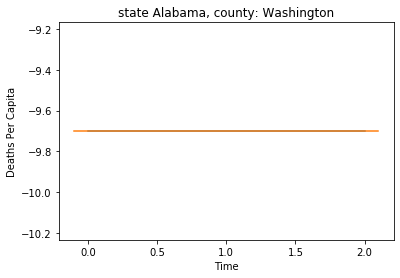

State: Pennsylvania, county: Montgomery, slope: 0.18024449420998895, rval: 0.9692499218445294


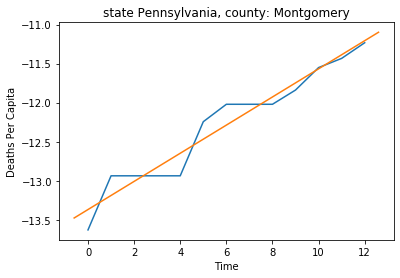

State: Pennsylvania, county: Northampton, slope: 0.15560784048112009, rval: 0.964613729804787


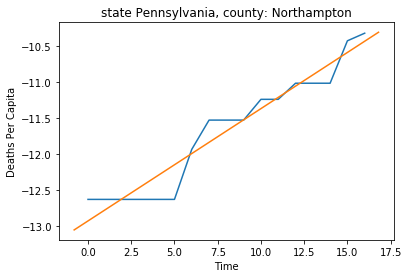

State: Pennsylvania, county: Pike, slope: 0.0, rval: 0.0


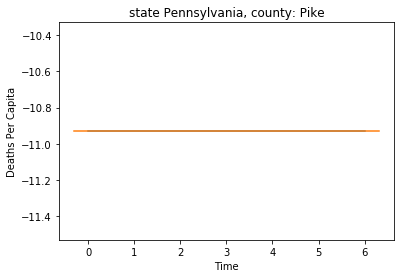

State: New Jersey, county: Bergen, slope: 0.22014138956330218, rval: 0.9887139688630036


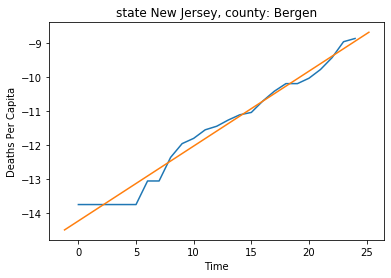

State: New Jersey, county: Burlington, slope: 0.1893227671575877, rval: 0.915634319133436


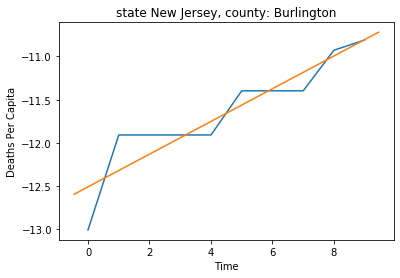

State: New Jersey, county: Camden, slope: 0.22007304834962804, rval: 0.8491044167911215


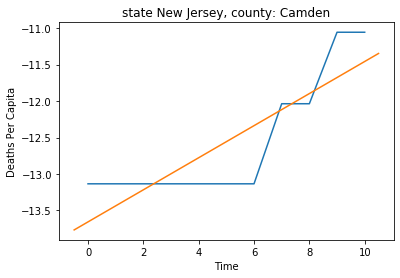

State: New Jersey, county: Essex, slope: 0.2654325383849974, rval: 0.9937606889407216


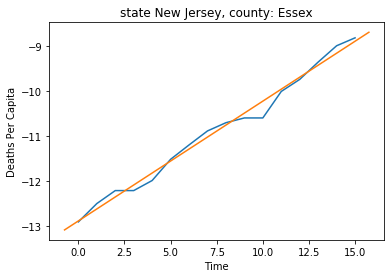

State: New Jersey, county: Gloucester, slope: 0.1658167934013842, rval: 0.9128557118265764


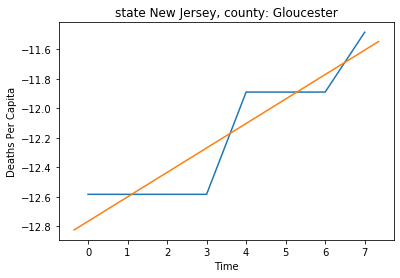

State: New Jersey, county: Hudson, slope: 0.30734487090719437, rval: 0.9632487004647824


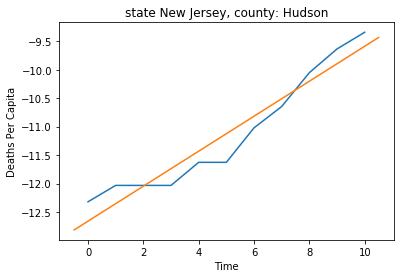

State: New Jersey, county: Mercer, slope: 0.511599580975408, rval: 0.9254096583918969


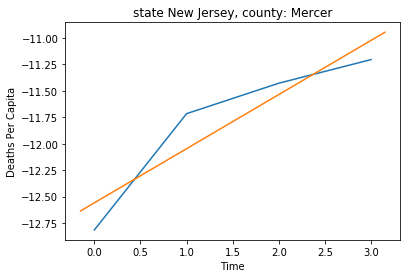

State: New Jersey, county: Middlesex, slope: 0.37011320926840935, rval: 0.9740464551468273


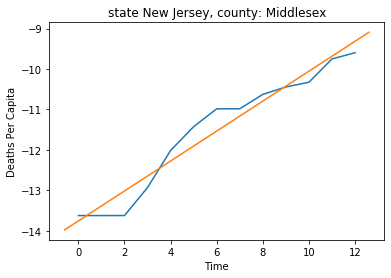

State: New Jersey, county: Monmouth, slope: 0.21245505488309707, rval: 0.972591502352601


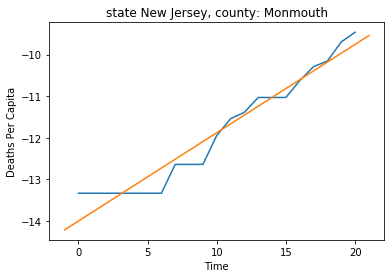

State: New Jersey, county: Morris, slope: 0.30051205111889046, rval: 0.9689992259554355


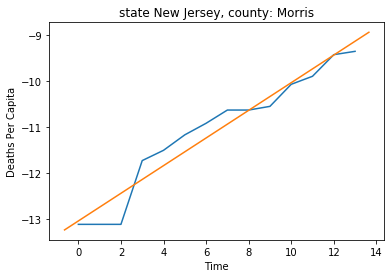

State: New Jersey, county: Ocean, slope: 0.30576015321263933, rval: 0.948019399007161


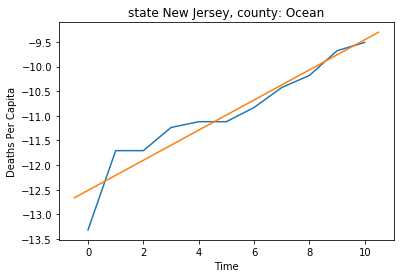

State: New Jersey, county: Passaic, slope: 0.24248483221366, rval: 0.978362618119448


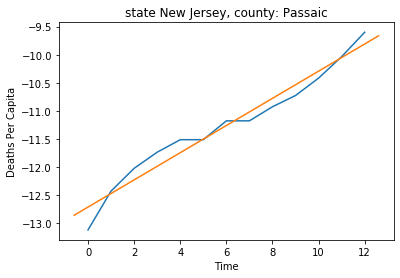

State: New Jersey, county: Salem, slope: 0.20794415416798362, rval: 0.7745966692414834


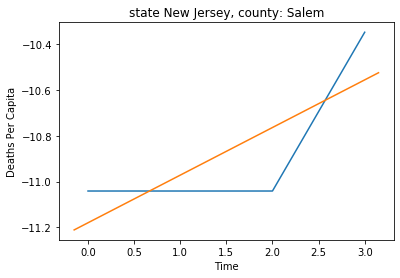

State: New Jersey, county: Somerset, slope: 0.2463368167455056, rval: 0.9760475099359416


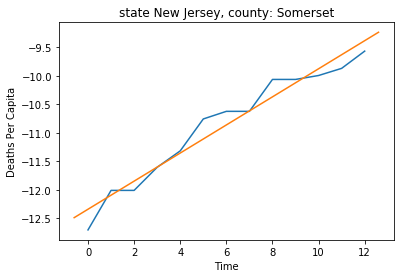

State: New Jersey, county: Sussex, slope: 0.3865461465610742, rval: 0.9579256042396402


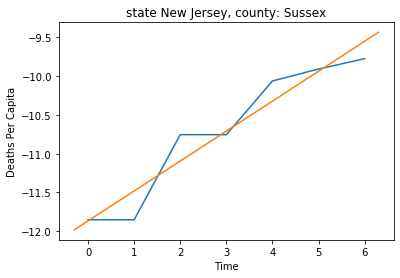

State: New Jersey, county: Union, slope: 0.34433046754863456, rval: 0.9824763158740236


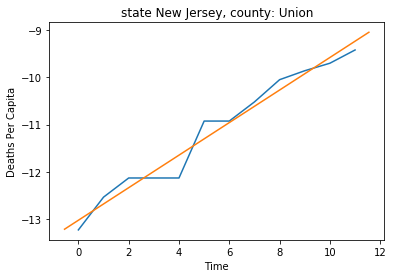

State: New Jersey, county: Warren, slope: 0.12310387845635841, rval: 0.9359522052345673


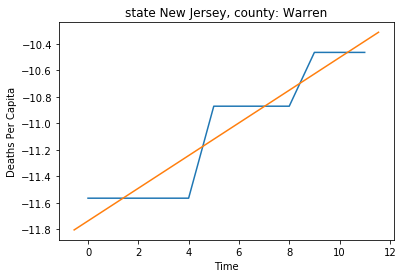

State: Michigan, county: Clinton, slope: 0.0, rval: 0.0


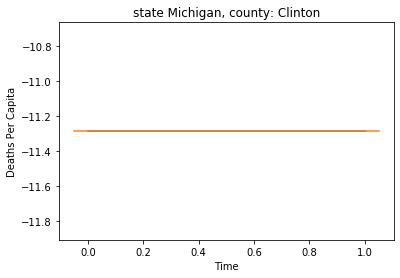

State: Michigan, county: Eaton, slope: 0.6931471805599454, rval: 1.0


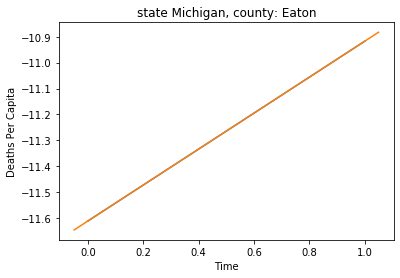

State: Michigan, county: Emmet, slope: 0.3465735902799727, rval: 0.8660254037844387


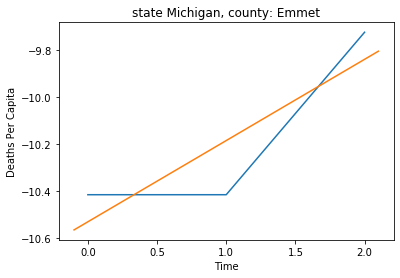

State: Michigan, county: Genesee, slope: 0.22694887969881045, rval: 0.8660908226388464


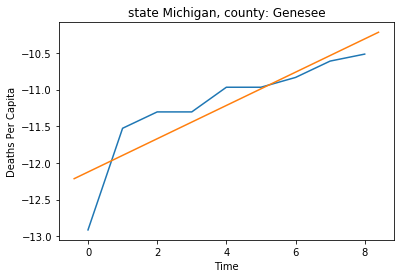

State: Michigan, county: Hillsdale, slope: 0.0990210257942779, rval: 0.6546536707079772


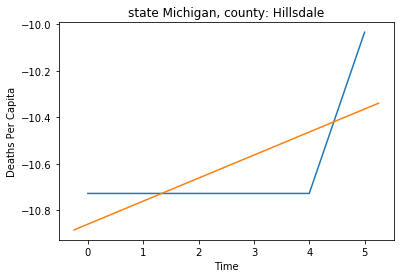

State: Michigan, county: Isabella, slope: 0.0990210257942779, rval: 0.6546536707079772


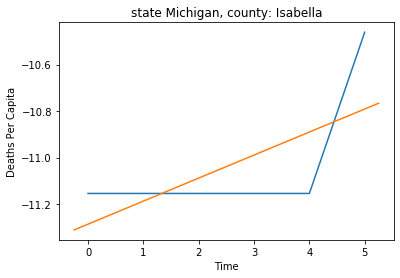

State: Michigan, county: Jackson, slope: 0.23616143330229505, rval: 0.9258016974859583


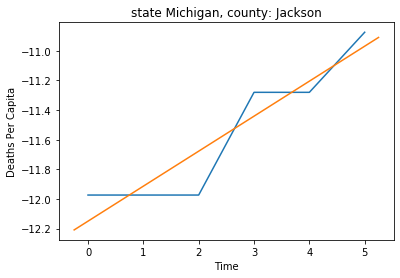

State: Michigan, county: Kalkaska, slope: 0.0, rval: 0.0


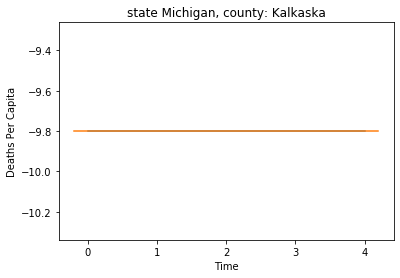

State: Michigan, county: Livingston, slope: 0.08821873207126578, rval: 0.7977240352174655


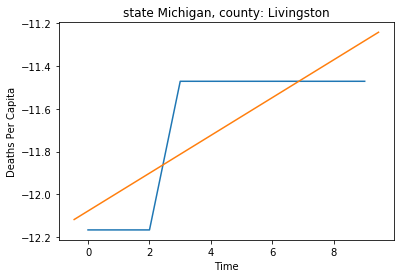

State: Michigan, county: Macomb, slope: 0.33210572696645546, rval: 0.9713109870503903


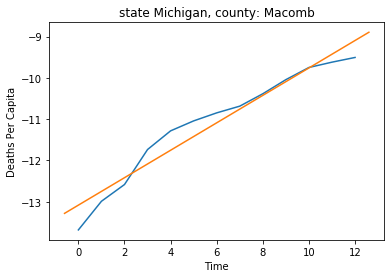

State: Michigan, county: Muskegon, slope: 0.0, rval: 0.0


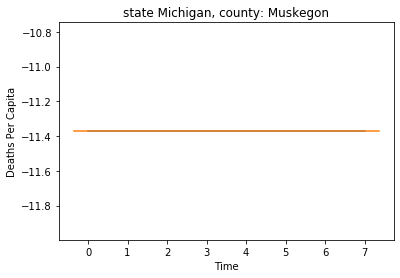

State: Michigan, county: Oakland, slope: 0.38905701031862117, rval: 0.9772062935014074


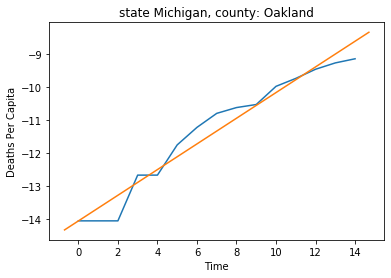

State: Michigan, county: Tuscola, slope: 0.11552453009332424, rval: 0.8660254037844387


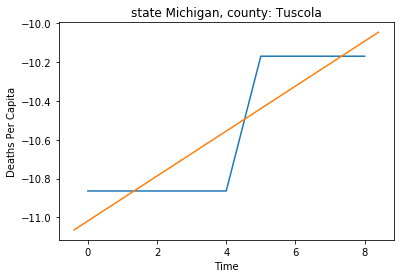

State: Michigan, county: Washtenaw, slope: 0.17162740404710222, rval: 0.9330674466402429


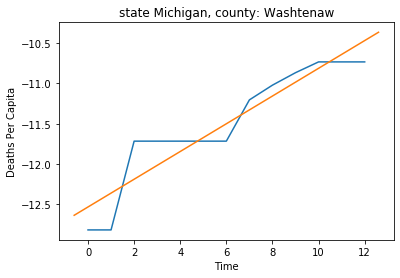

State: Michigan, county: Wayne, slope: 0.32580188468772414, rval: 0.9928010073590524


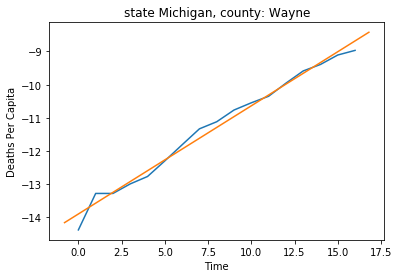

State: Indiana, county: Clark, slope: 0.3465735902799727, rval: 0.8660254037844387


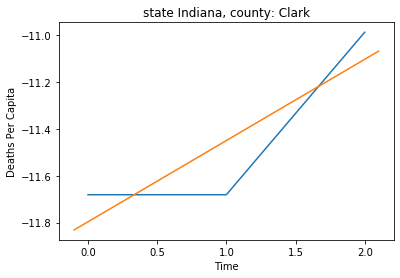

State: Indiana, county: Dearborn, slope: 0.0, rval: 0.0


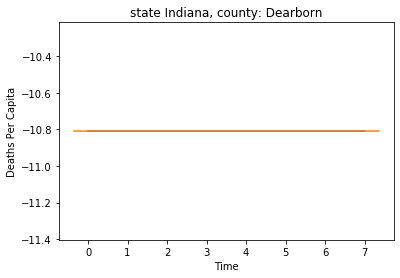

State: Indiana, county: Decatur, slope: 0.5257495372027782, rval: 0.9337692650479829


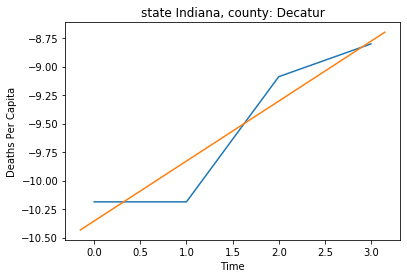

State: Indiana, county: Elkhart, slope: 0.3701301974112498, rval: 0.9219957766987149


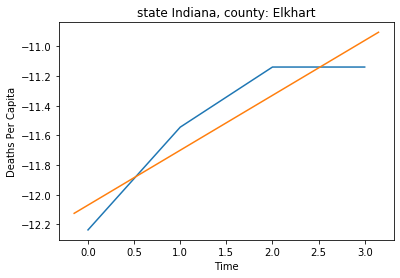

State: Indiana, county: Fayette, slope: 0.19197422884586296, rval: 0.8958685929456761


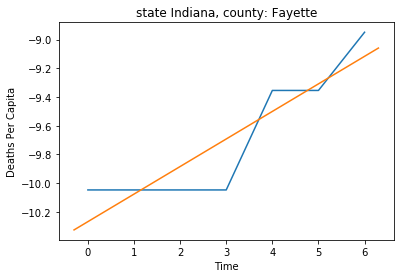

State: Indiana, county: Franklin, slope: 0.2443763303466081, rval: 0.9507790691329012


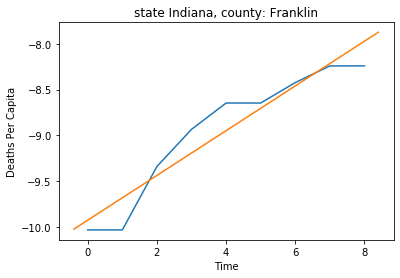

State: Indiana, county: Hamilton, slope: 0.0, rval: 0.0


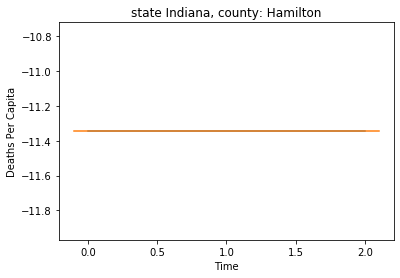

State: Indiana, county: Hancock, slope: 0.1008214080814466, rval: 0.8528028654224418


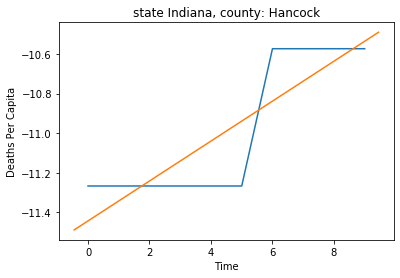

State: Indiana, county: Harrison, slope: nan, rval: 0.0


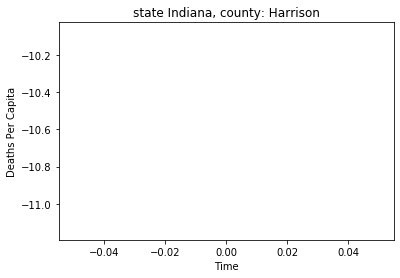

State: Indiana, county: Howard, slope: 0.06721427205429774, rval: 0.6963106238227913


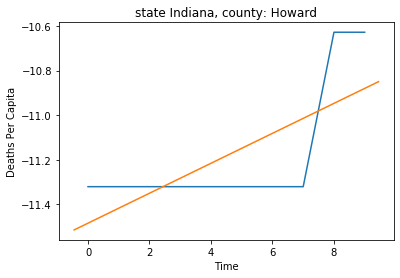

State: Indiana, county: Johnson, slope: 0.09234648241395736, rval: 0.8677571121552503


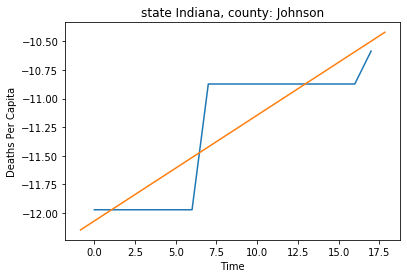

State: Indiana, county: Lake, slope: 0.40046460195893224, rval: 0.902162756520326


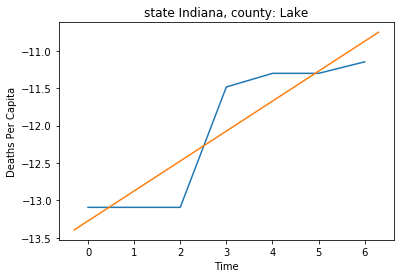

State: Indiana, county: Lawrence, slope: 0.6931471805599454, rval: 0.8660254037844387


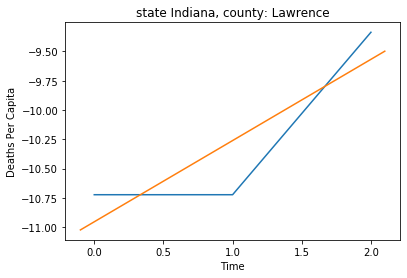

State: Indiana, county: Madison, slope: 0.25230802414770925, rval: 0.8469064378126113


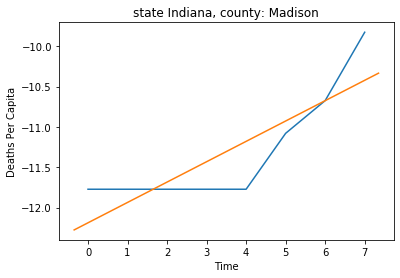

State: Indiana, county: Marion, slope: 0.20381414340221238, rval: 0.9893926313962815


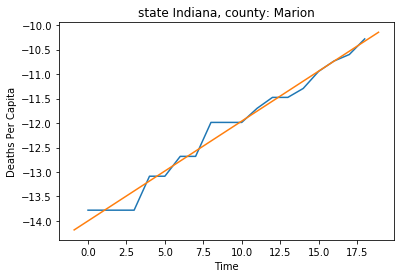

State: Indiana, county: Morgan, slope: 0.0, rval: 0.0


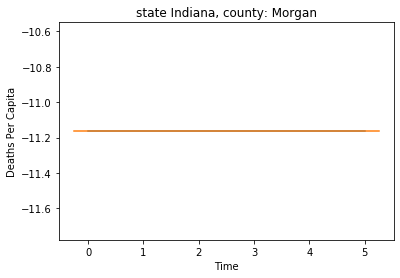

State: Indiana, county: Putnam, slope: 0.0, rval: 0.0


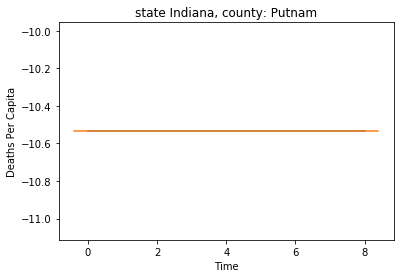

State: Indiana, county: Ripley, slope: 0.0, rval: 0.0


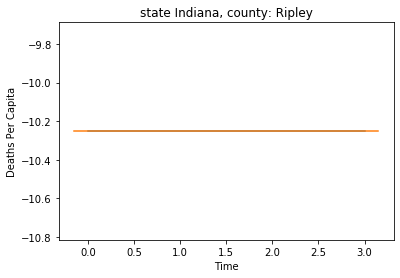

State: Indiana, county: Scott, slope: 0.0, rval: 0.0


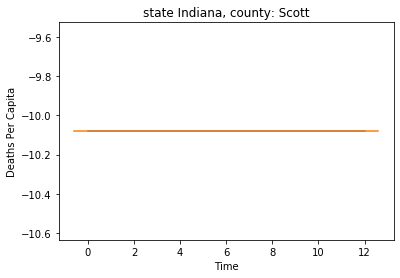

State: Indiana, county: Vigo, slope: 0.1237762822428474, rval: 0.8451542547285166


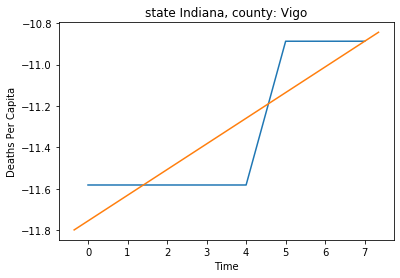

State: Delaware, county: Kent, slope: 0.0, rval: 0.0


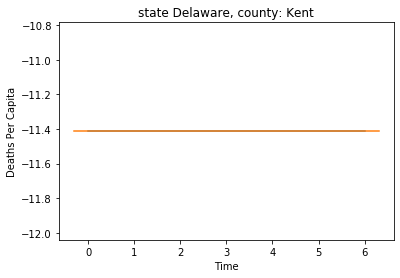

State: Delaware, county: Sussex, slope: 0.17634429630954881, rval: 0.9324566852370343


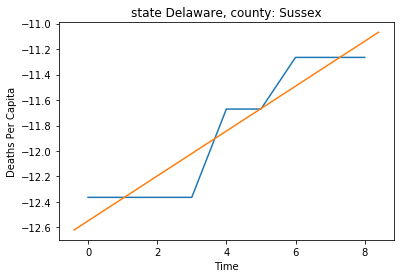

State: Virginia, county: Fairfax, slope: 0.08206026276146643, rval: 0.32483280208749493


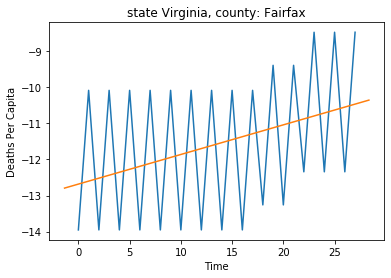

State: Virginia, county: Henrico, slope: 0.11342408409162742, rval: 0.6150531523587125


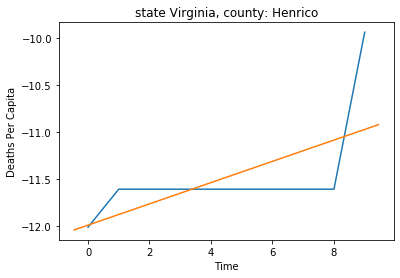

State: New Mexico, county: Bernalillo, slope: 0.33372458373164005, rval: 0.9374640575373265


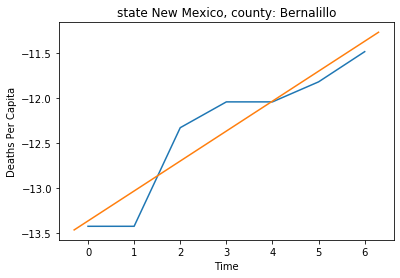

State: New Mexico, county: Sandoval, slope: 0.3465735902799727, rval: 0.8660254037844387


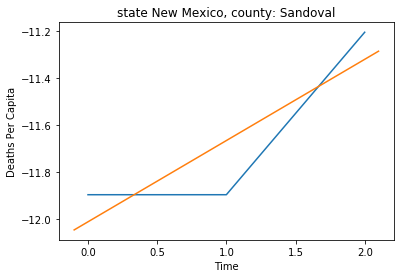

State: Minnesota, county: Chisago, slope: nan, rval: 0.0


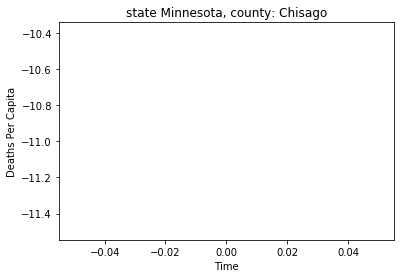

State: Minnesota, county: Martin, slope: 0.09902102579427792, rval: 0.7559289460184546


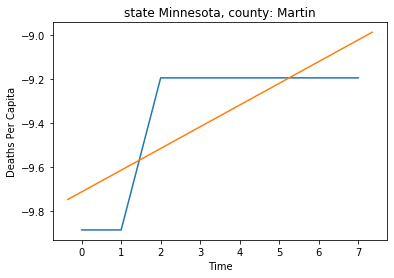

State: Minnesota, county: Olmsted, slope: 0.6931471805599454, rval: 1.0


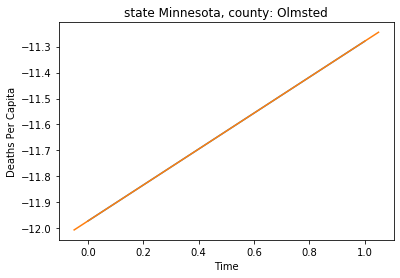

State: Iowa, county: Allamakee, slope: 0.0, rval: 0.0


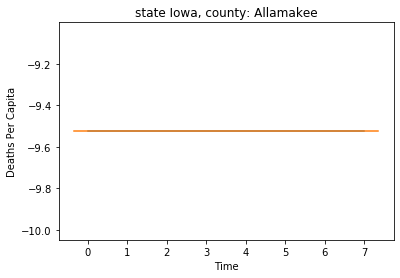

State: Iowa, county: Dubuque, slope: 0.0, rval: 0.0


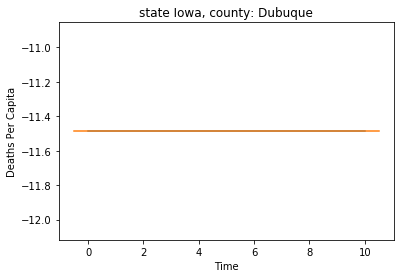

State: Iowa, county: Linn, slope: 0.25745466706512254, rval: 0.9230930832457442


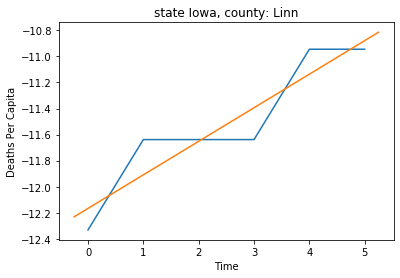

State: Iowa, county: Muscatine, slope: 0.0, rval: 0.0


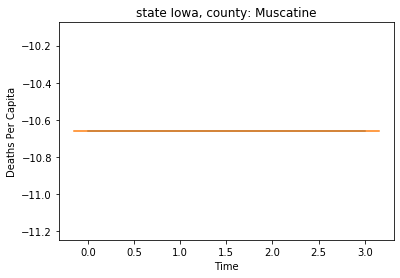

State: Iowa, county: Poweshiek, slope: 0.0, rval: 0.0


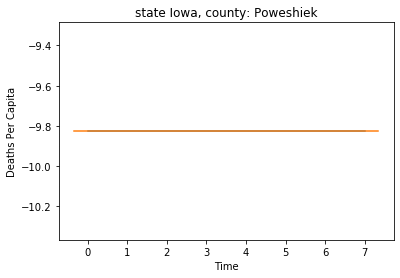

State: Iowa, county: Washington, slope: 0.20794415416798362, rval: 0.8660254037844386


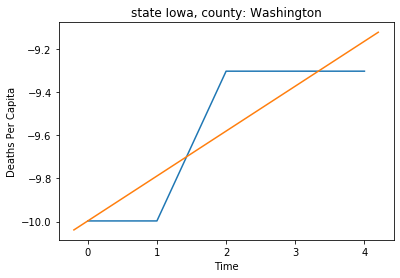

State: New York, county: Albany, slope: 0.2227973080371253, rval: 0.8825226081218281


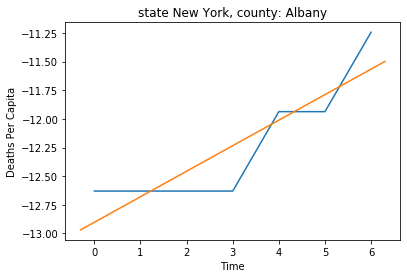

State: New York, county: Allegany, slope: 0.0, rval: 0.0


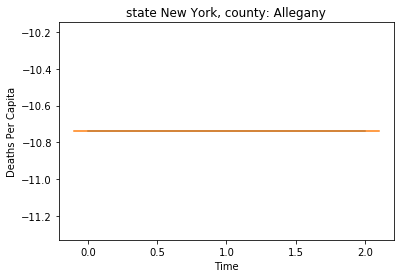

State: New York, county: Broome, slope: 0.1321922125391169, rval: 0.9260013763407475


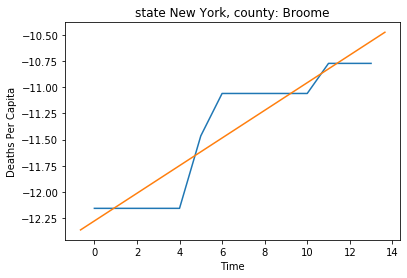

State: New York, county: Columbia, slope: 0.15843364127084467, rval: 0.828078671210825


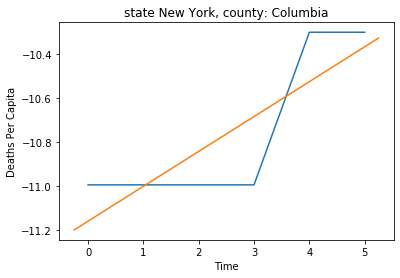

State: New York, county: Delaware, slope: 0.0, rval: 0.0


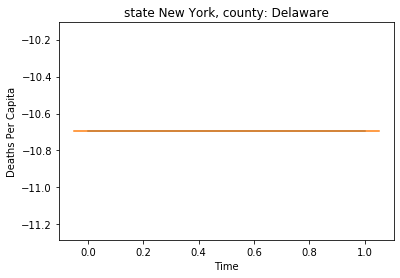

State: New York, county: Dutchess, slope: 0.21757117369570272, rval: 0.9413044858707974


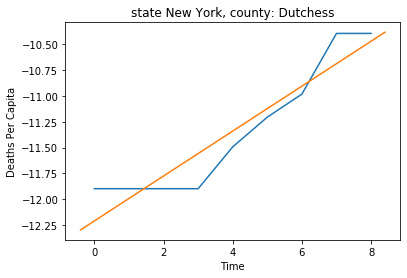

State: New York, county: Erie, slope: 0.24539326757633842, rval: 0.938063499276865


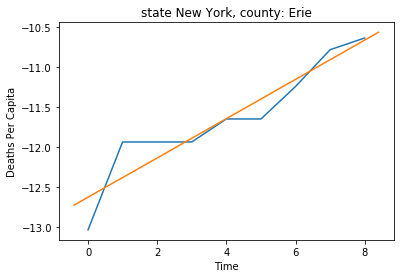

State: New York, county: Genesee, slope: 0.0, rval: 0.0


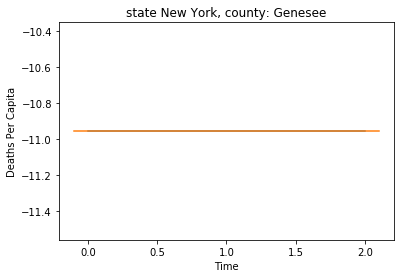

State: New York, county: Herkimer, slope: 0.0, rval: 0.0


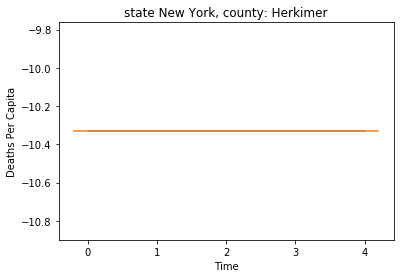

State: New York, county: Livingston, slope: 0.0, rval: 0.0


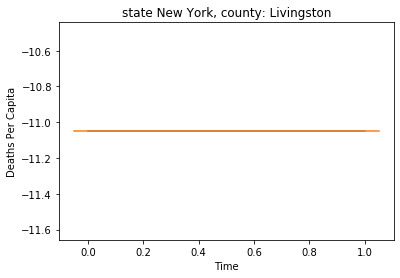

State: New York, county: Madison, slope: 0.0, rval: 0.0


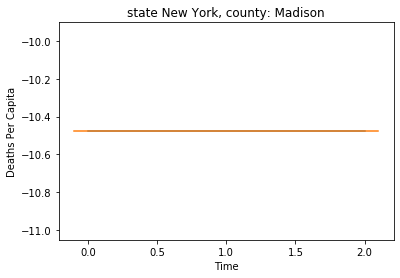

State: New York, county: Monroe, slope: 0.17486151328872435, rval: 0.9831241962793738


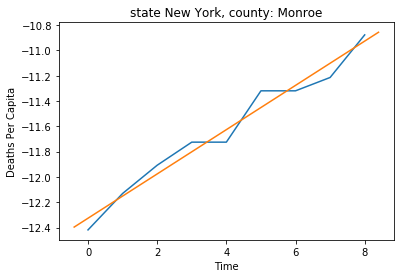

State: New York, county: Nassau, slope: 0.24951747377797862, rval: 0.9955337271060329


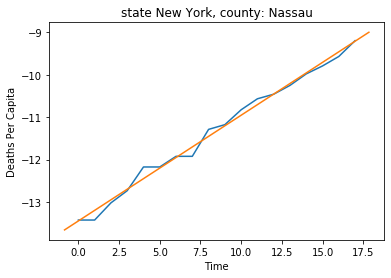

State: New York, county: Orange, slope: 0.3663413859298528, rval: 0.8624487737151627


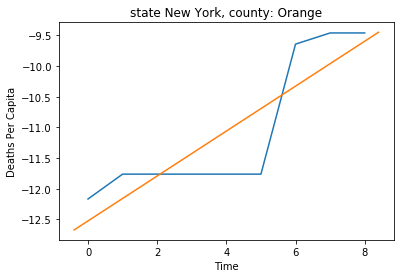

State: New York, county: Oswego, slope: 0.0, rval: 0.0


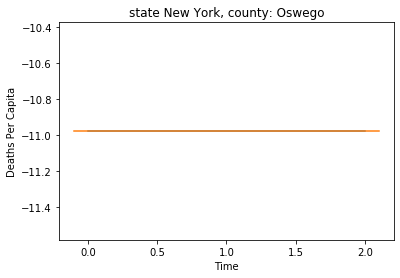

State: New York, county: Otsego, slope: 0.0, rval: 0.0


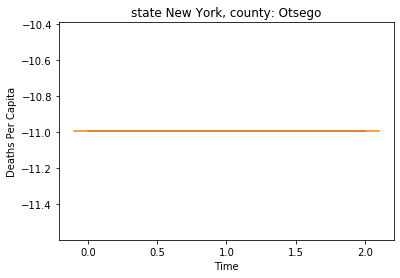

State: New York, county: Rockland, slope: 0.17117436443624873, rval: 0.9586077936836641


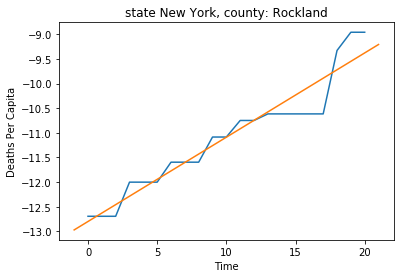

State: New York, county: Schenectady, slope: 0.0, rval: 0.0


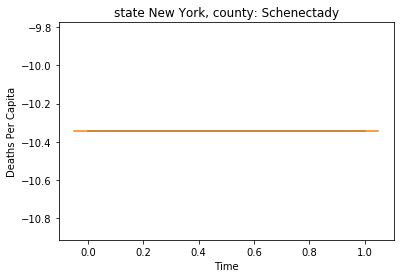

State: New York, county: Steuben, slope: 0.0, rval: 0.0


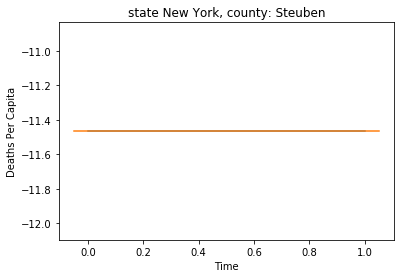

State: New York, county: Suffolk, slope: 0.21191458324221998, rval: 0.98752304193503


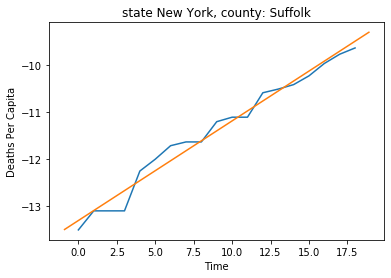

State: New York, county: Sullivan, slope: 0.505145728861651, rval: 0.8417938717901243


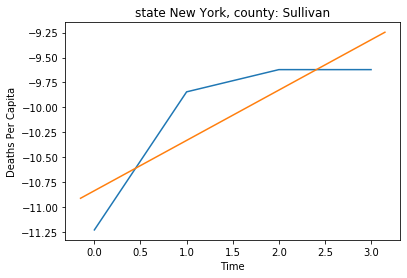

State: New York, county: Ulster, slope: 0.25111138026699636, rval: 0.828078671210825


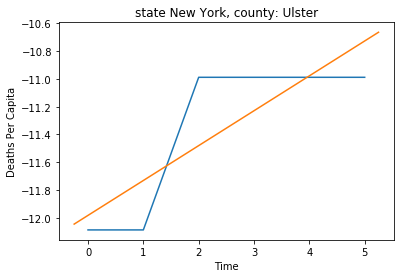

State: New York, county: Westchester, slope: 0.2509921504632001, rval: 0.9551805394688211


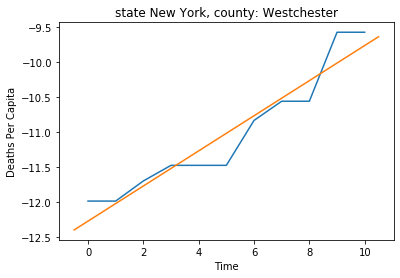

State: New York, county: Wyoming, slope: 0.0, rval: 0.0


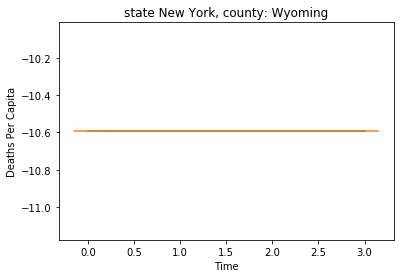

State: Mississippi, county: Bolivar, slope: 0.0, rval: 0.0


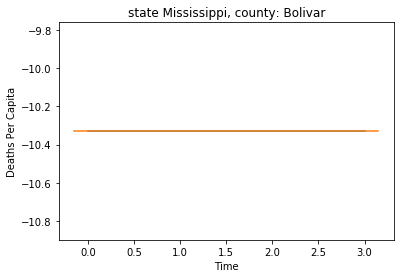

State: Mississippi, county: Chickasaw, slope: 0.6931471805599436, rval: 1.0


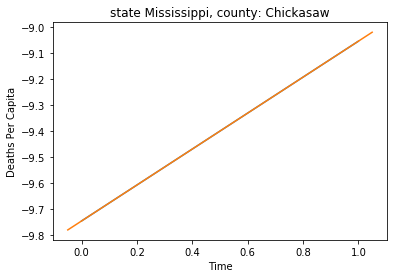

State: Mississippi, county: Hancock, slope: 0.0, rval: 0.0


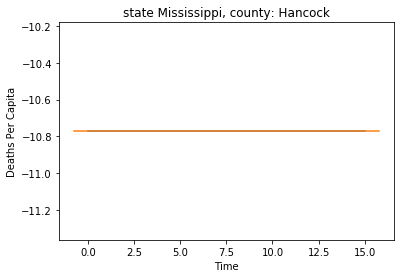

State: Mississippi, county: Holmes, slope: 0.02100446001696804, rval: 0.2901294265928297


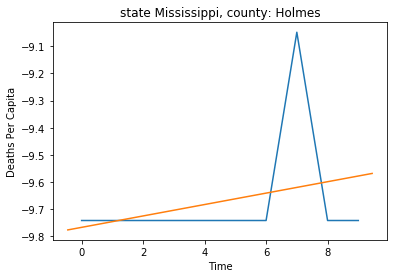

State: Mississippi, county: Humphreys, slope: 0.0, rval: 0.0


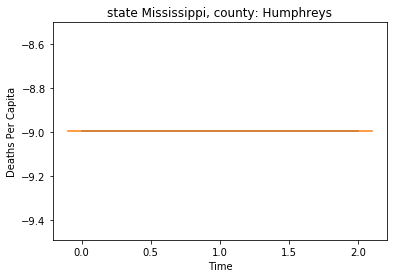

State: Mississippi, county: Lafayette, slope: 0.0, rval: 0.0


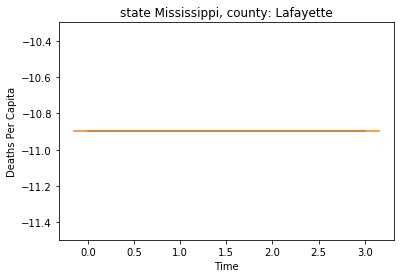

State: Mississippi, county: Lee, slope: 0.0, rval: 0.0


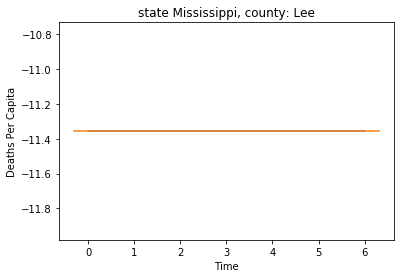

State: Mississippi, county: Leflore, slope: 0.0, rval: 0.0


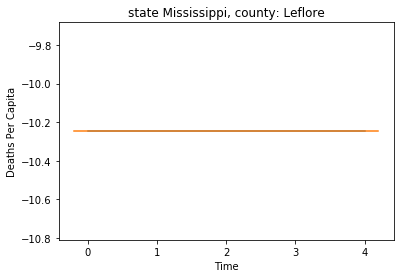

State: Mississippi, county: Marshall, slope: 0.0, rval: 0.0


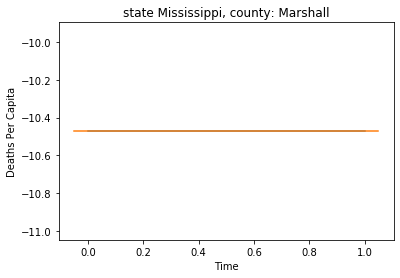

State: Mississippi, county: Monroe, slope: 0.0, rval: 0.0


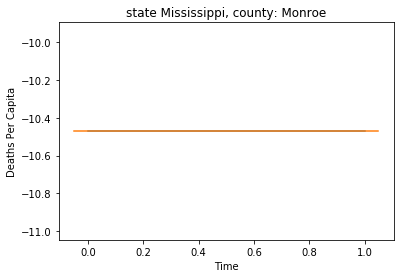

State: Florida, county: Osceola, slope: 0.41588830833596674, rval: 0.8660254037844387


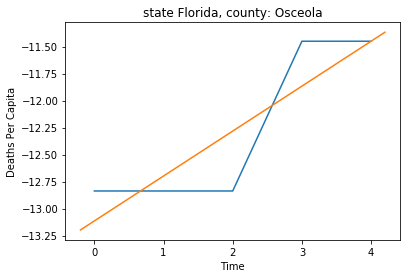

State: Mississippi, county: Montgomery, slope: 0.0, rval: 0.0


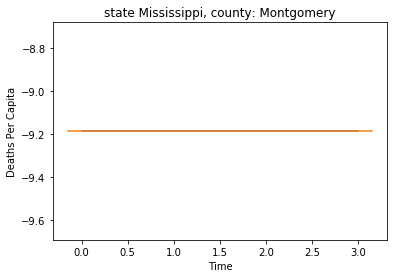

State: Mississippi, county: Panola, slope: 0.0, rval: 0.0


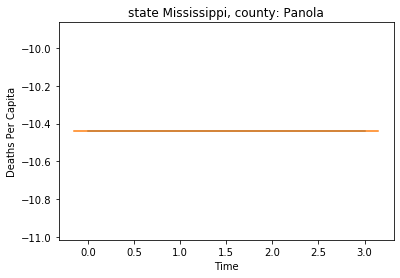

State: Mississippi, county: Perry, slope: 0.0, rval: 0.0


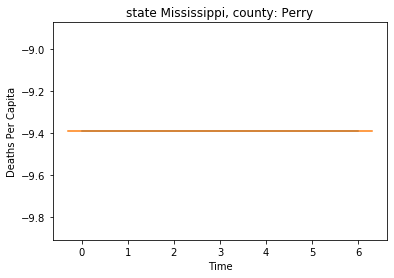

State: Mississippi, county: Pontotoc, slope: nan, rval: 0.0


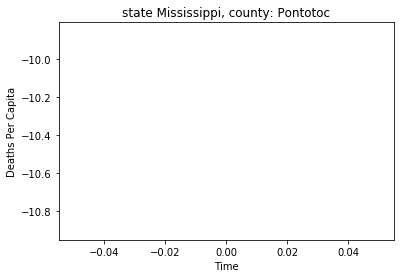

State: Mississippi, county: Sunflower, slope: 0.0, rval: 0.0


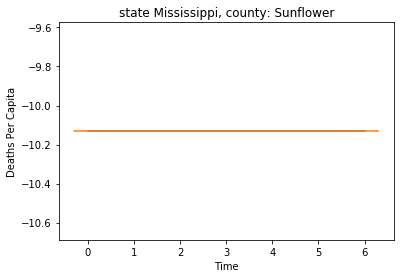

State: Mississippi, county: Tippah, slope: 0.09155102405567576, rval: 0.74484973726699


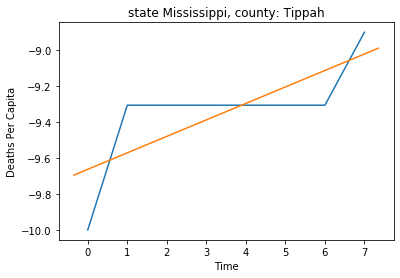

State: Mississippi, county: Tunica, slope: 0.0, rval: 0.0


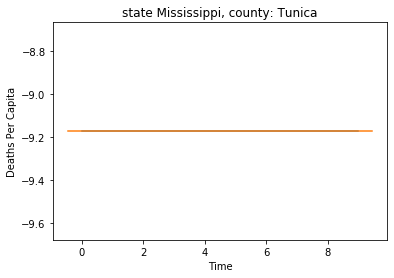

State: Mississippi, county: Webster, slope: 0.0, rval: 0.0


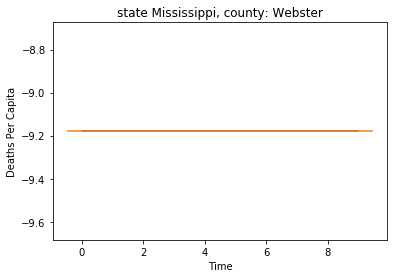

State: Mississippi, county: Wilkinson, slope: 0.10082140808144635, rval: 0.8528028654224417


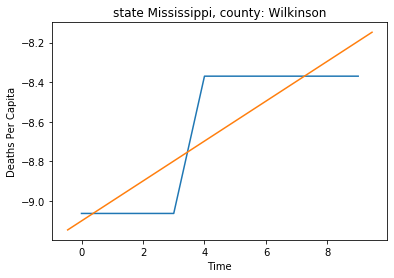

State: Mississippi, county: Yazoo, slope: 0.0, rval: 0.0


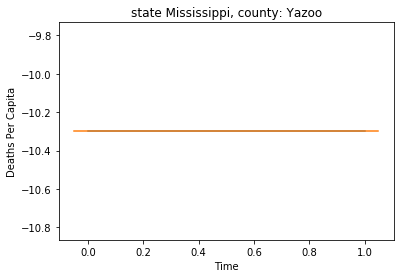

State: Kansas, county: Johnson, slope: 0.14145536517311455, rval: 0.9157540034753033


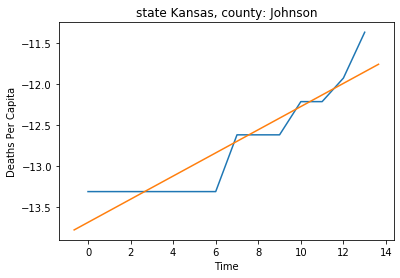

State: Kansas, county: Leavenworth, slope: nan, rval: 0.0


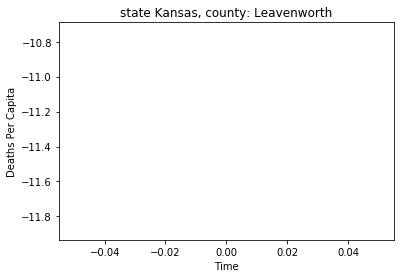

State: Florida, county: Broward, slope: 0.1855310434974852, rval: 0.9634174654703718


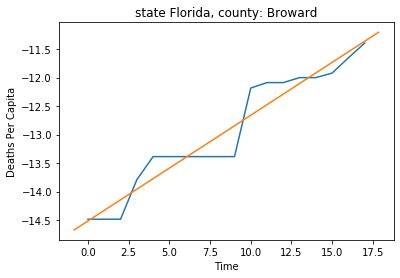

State: Kansas, county: Wyandotte, slope: 0.09035470138420852, rval: 0.920953198262478


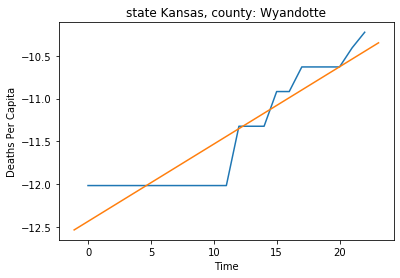

State: Florida, county: Citrus, slope: 0.10502230008484023, rval: 0.8703882797784892


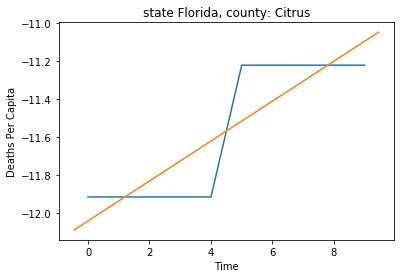

State: Florida, county: Clay, slope: 0.13523736227522562, rval: 0.9543584024319612


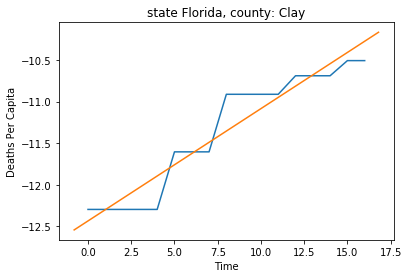

State: Florida, county: DeSoto, slope: -0.13862943611198908, rval: -0.7071067811865476


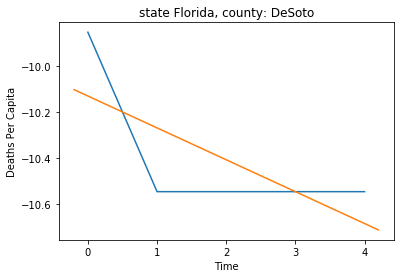

State: Washington, county: Benton, slope: 0.15026150117278503, rval: 0.9678956955234395


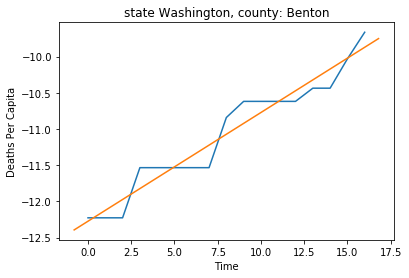

State: Washington, county: Chelan, slope: 0.038349092445213666, rval: 0.796163371858905


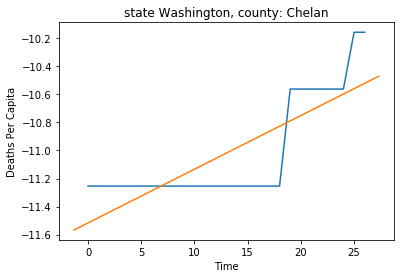

State: Washington, county: Clark, slope: 0.07169473124127078, rval: 0.9624423998236352


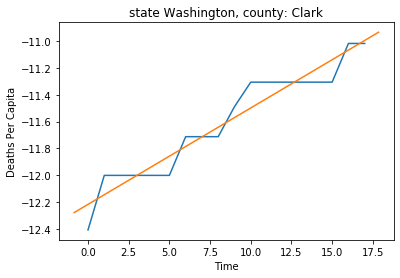

State: Florida, county: Highlands, slope: 0.04620981203732969, rval: 0.5477225575051661


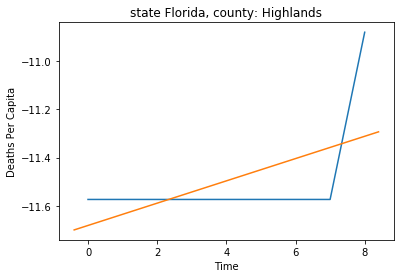

State: Washington, county: Franklin, slope: nan, rval: 0.0


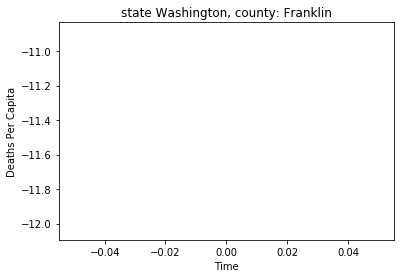

State: Washington, county: Island, slope: 0.08939483512458696, rval: 0.7592151167710514


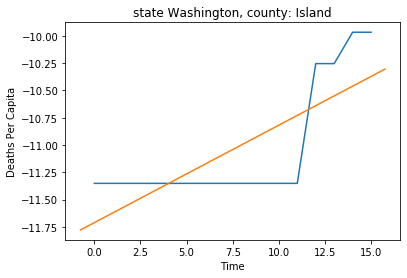

State: Florida, county: Lee, slope: 0.08853919496567739, rval: 0.954054752117345


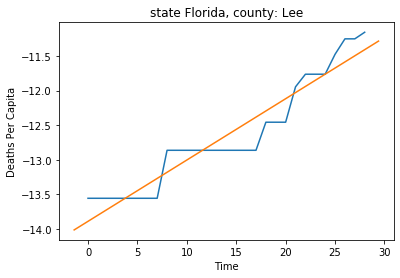

State: Washington, county: King, slope: 0.11551064951011882, rval: 0.951404537237257


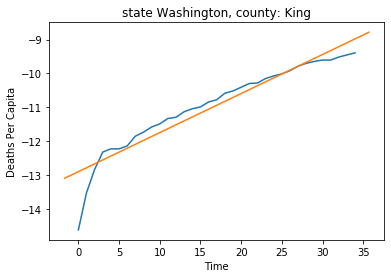

State: Washington, county: Klickitat, slope: 0.0, rval: 0.0


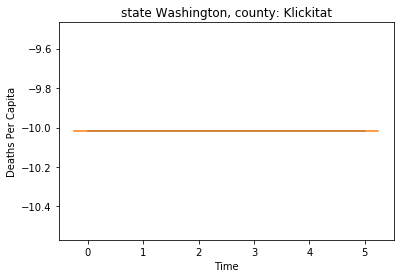

State: Florida, county: Monroe, slope: 0.0, rval: 0.0


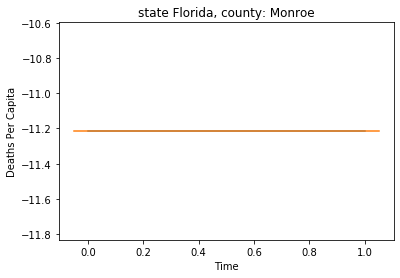

State: Washington, county: Skagit, slope: 0.16160435685168503, rval: 0.9113361265389274


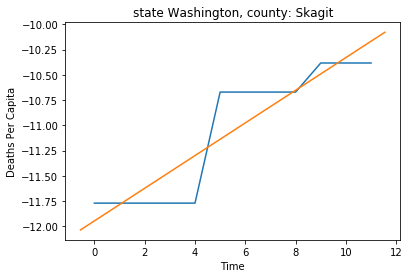

State: Florida, county: Putnam, slope: nan, rval: 0.0


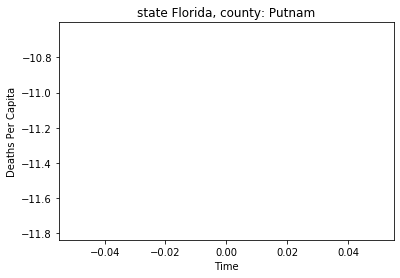

State: Washington, county: Snohomish, slope: 0.14577332304729076, rval: 0.9835016950655723


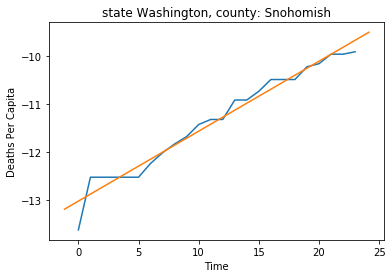

State: Washington, county: Spokane, slope: 0.21670029408045197, rval: 0.8785855007455085


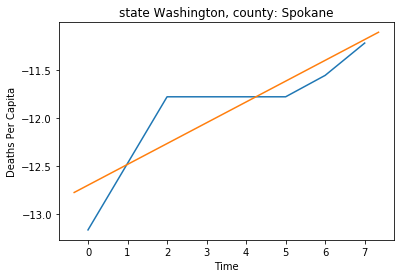

State: Washington, county: Whatcom, slope: 0.15464557355561107, rval: 0.9686396300562079


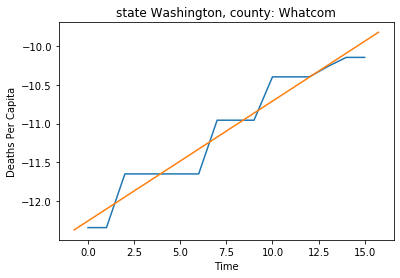

State: Florida, county: Sarasota, slope: 0.1789469877929134, rval: 0.9002195203073383


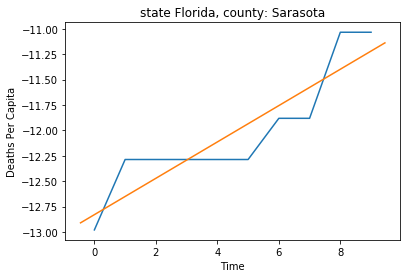

State: Washington, county: Yakima, slope: 0.17572162973488895, rval: 0.9471159548188873


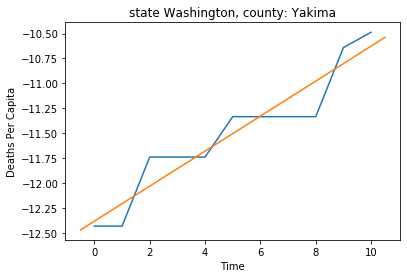

State: Florida, county: Sumter, slope: 0.4054651081081655, rval: 1.0


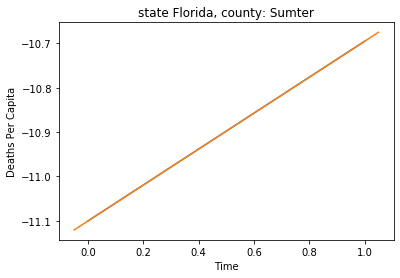

State: Arizona, county: Coconino, slope: 0.19225240476152278, rval: 0.9318718725013768


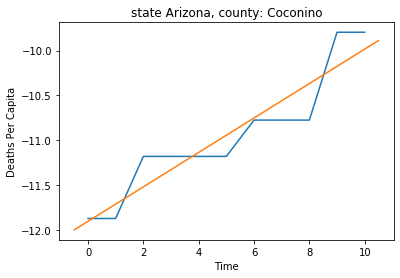

State: Arizona, county: Pima, slope: 0.14947583398653186, rval: 0.9534519052929034


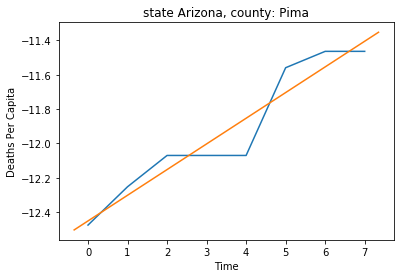

State: South Carolina, county: Anderson, slope: 0.32958368660043275, rval: 0.9422442921961158


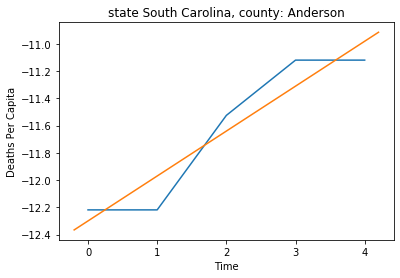

State: South Carolina, county: Beaufort, slope: 0.20794415416798362, rval: 0.8660254037844386


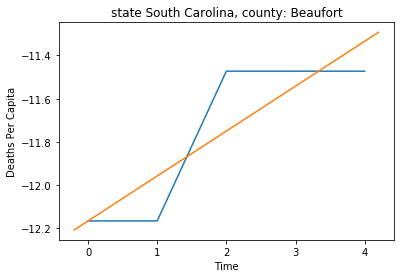

State: South Carolina, county: Calhoun, slope: 0.0, rval: 0.0


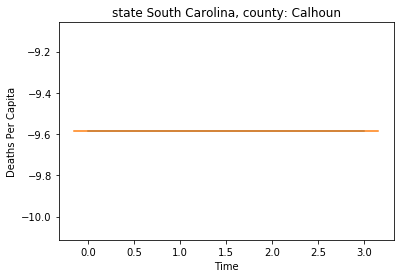

State: South Carolina, county: Clarendon, slope: 0.0, rval: 0.0


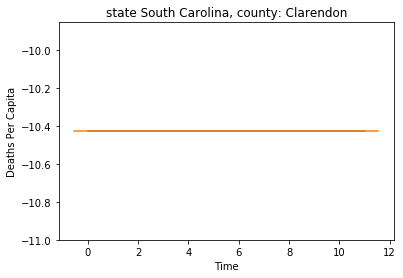

State: South Carolina, county: Florence, slope: 0.11872497895823324, rval: 0.9429449101537573


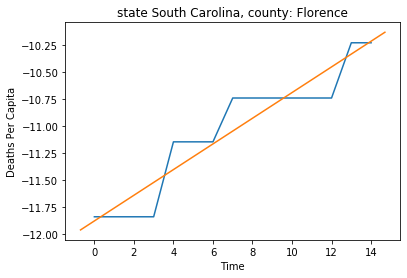

State: South Carolina, county: Horry, slope: 0.16704705274116113, rval: 0.9318010094568787


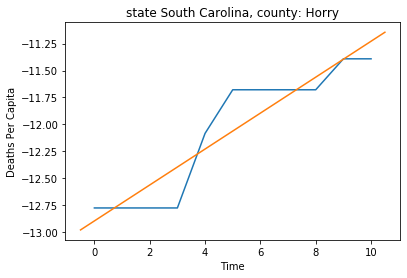

State: South Carolina, county: Kershaw, slope: 0.07755492929342046, rval: 0.8193464903987028


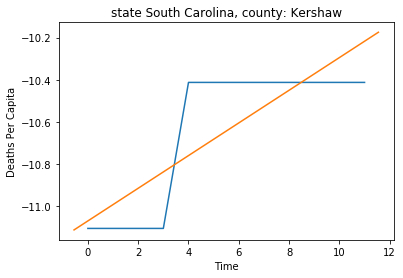

State: South Carolina, county: Lee, slope: 0.0, rval: 0.0


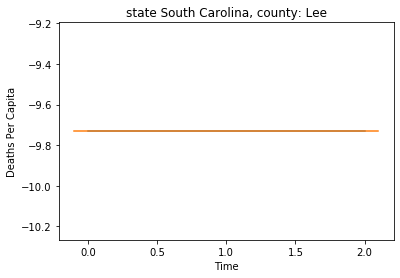

State: South Carolina, county: Richland, slope: 0.17273555061790485, rval: 0.9094398169093851


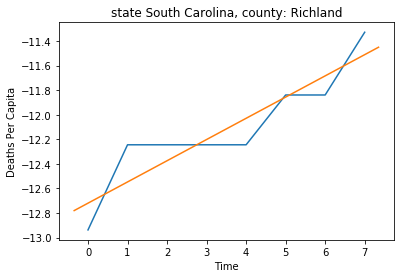

State: South Carolina, county: Sumter, slope: 0.0898864599819362, rval: 0.8399853300956448


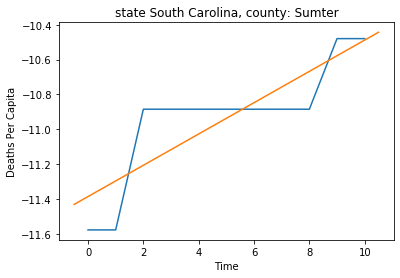

State: North Carolina, county: Cherokee, slope: 0.0, rval: 0.0


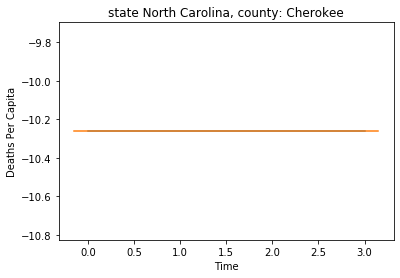

State: North Carolina, county: Davie, slope: 0.0, rval: 0.0


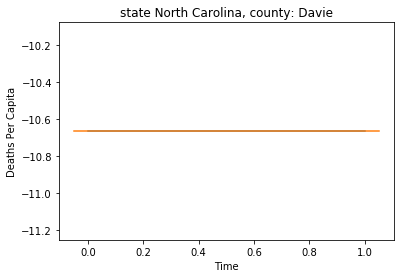

State: North Carolina, county: Montgomery, slope: 0.0, rval: 0.0


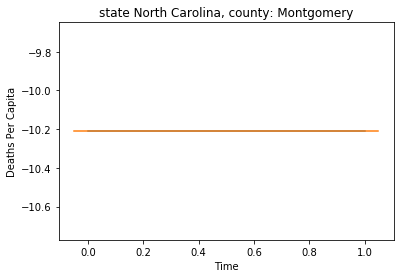

State: Missouri, county: Camden, slope: 0.0, rval: 0.0


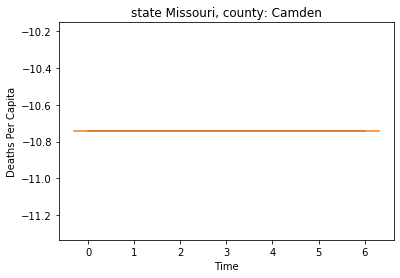

State: Missouri, county: Cole, slope: nan, rval: 0.0


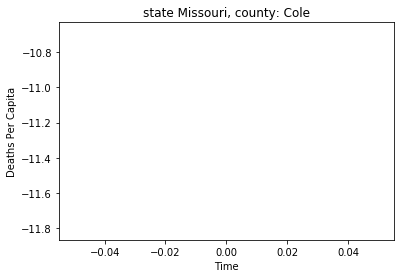

State: Missouri, county: Greene, slope: 0.13255982735632896, rval: 0.8355517382439304


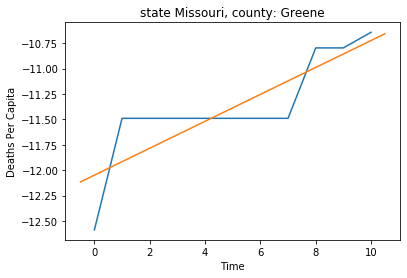

State: Missouri, county: Henry, slope: 0.0, rval: 0.0


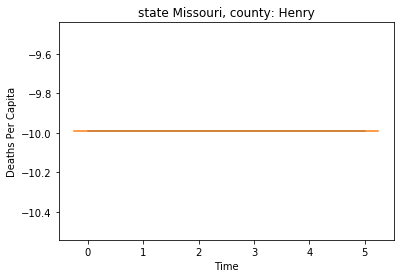

State: Missouri, county: Lafayette, slope: 0.0, rval: 0.0


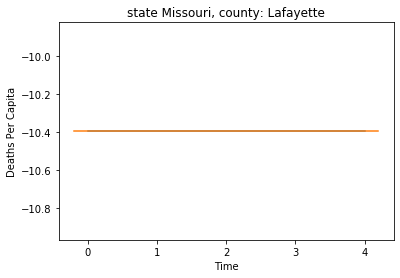

State: Missouri, county: Pulaski, slope: 0.0, rval: 0.0


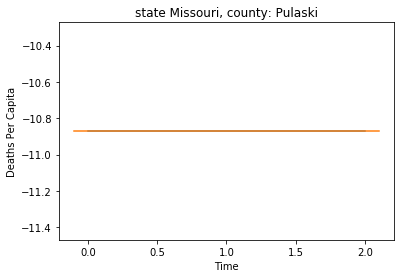

State: Kentucky, county: Anderson, slope: 0.0, rval: 0.0


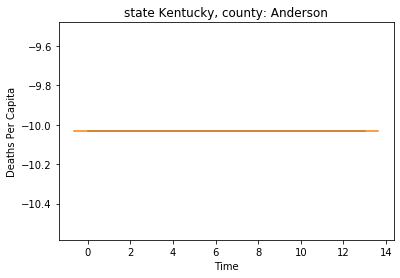

State: Kentucky, county: Bourbon, slope: 0.0, rval: 0.0


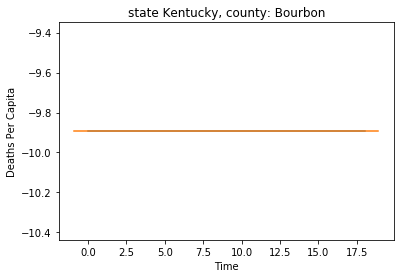

State: Kentucky, county: Daviess, slope: 0.20794415416798362, rval: 0.7745966692414834


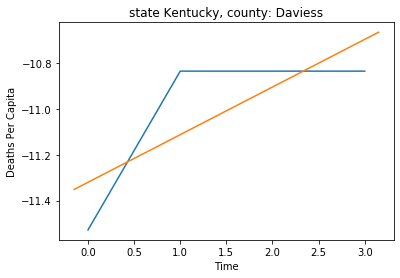

State: Kentucky, county: Fayette, slope: 0.33007008598092635, rval: 0.8908708063747479


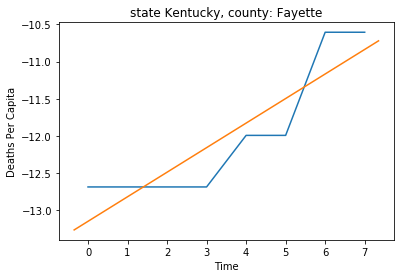

State: Kentucky, county: Jefferson, slope: 0.18963599654545082, rval: 0.9584826641858776


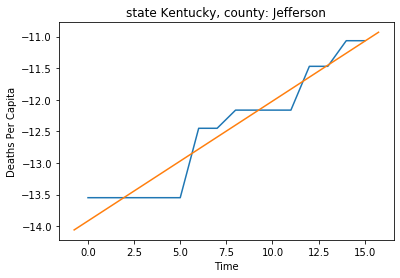

State: Kentucky, county: Kenton, slope: 0.19618076583359123, rval: 0.9313256894410552


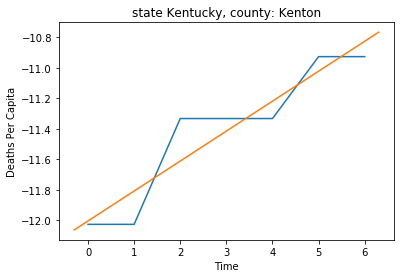

State: Kentucky, county: Pulaski, slope: 0.0, rval: 0.0


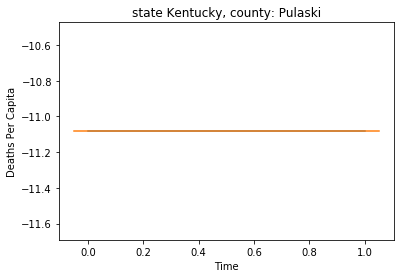

State: Georgia, county: Baker, slope: 0.0, rval: 0.0


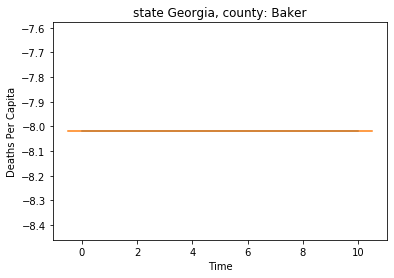

State: Georgia, county: Baldwin, slope: 0.0, rval: 0.0


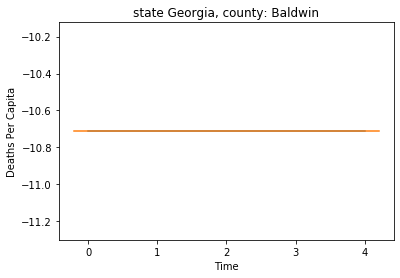

State: Georgia, county: Barrow, slope: 0.07617001984175224, rval: 0.8451542547285167


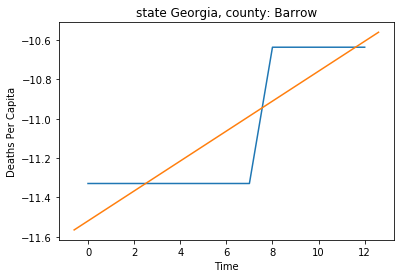

State: Georgia, county: Bartow, slope: 0.14573100511786635, rval: 0.8167589975575112


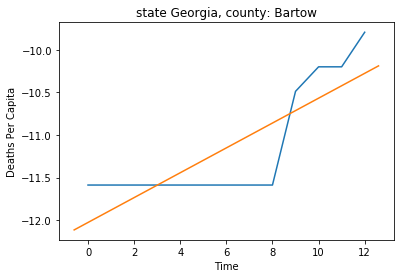

State: Kentucky, county: Simpson, slope: 0.0, rval: 0.0


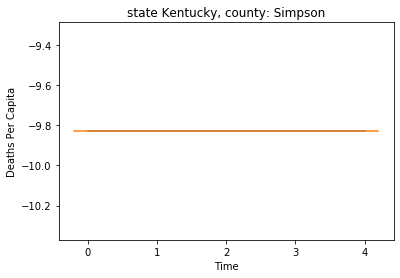

State: Georgia, county: Bryan, slope: 0.0, rval: 0.0


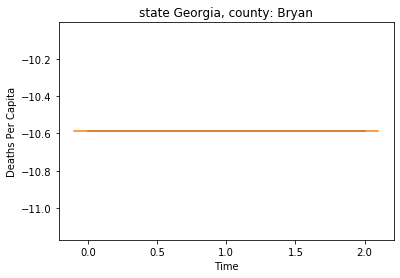

State: Georgia, county: Carroll, slope: 0.2079441541679831, rval: 0.8660254037844387


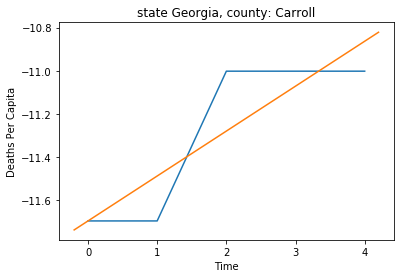

State: Georgia, county: Chatham, slope: 0.12163953243244965, rval: 0.8660254037844387


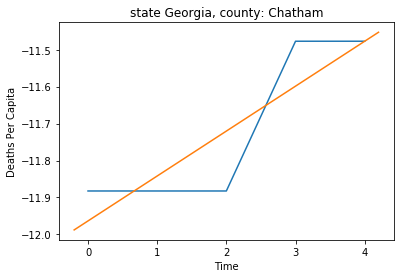

State: Georgia, county: Cherokee, slope: 0.27922657815078494, rval: 0.917950982809222


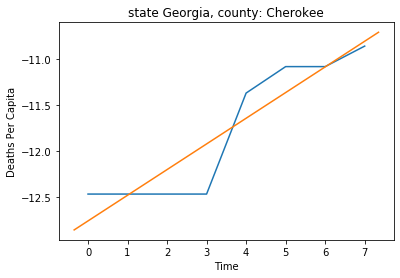

State: Georgia, county: Clarke, slope: 0.234835288997645, rval: 0.9360090761033442


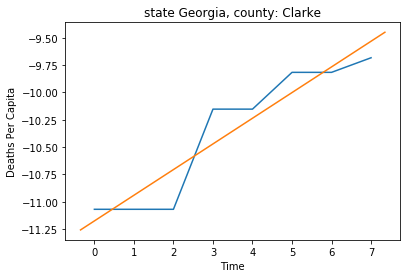

State: Georgia, county: Clayton, slope: 0.17887543666527414, rval: 0.8671756410025675


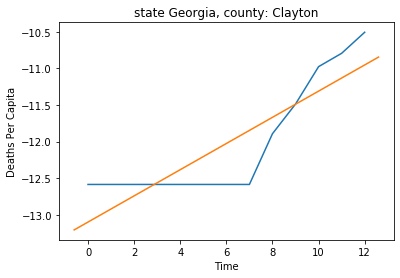

State: Georgia, county: Cobb, slope: 0.1544650160325238, rval: 0.9603121549587195


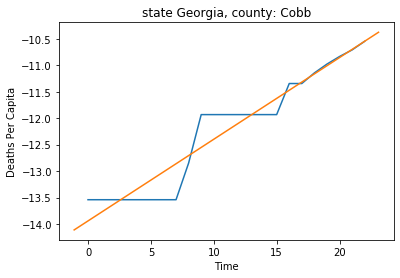

State: Georgia, county: Colquitt, slope: 0.3988984046564273, rval: 0.9482533428776211


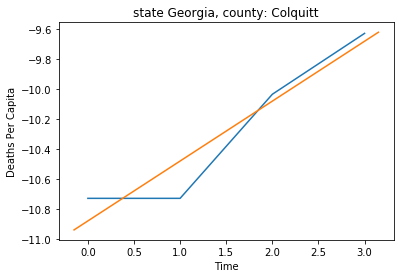

State: West Virginia, county: Jackson, slope: 0.0, rval: 0.0


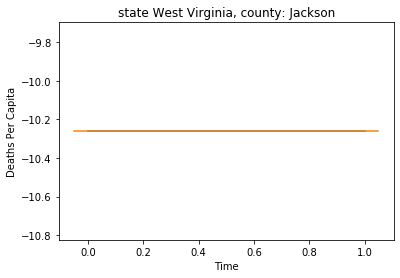

State: Georgia, county: Coweta, slope: 0.0, rval: 0.0


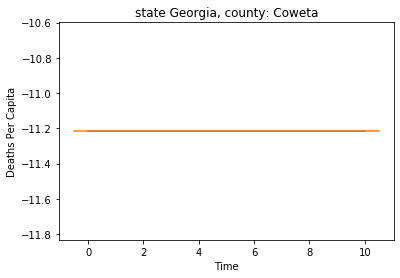

State: Georgia, county: DeKalb, slope: 0.18760637003220215, rval: 0.9363518933071696


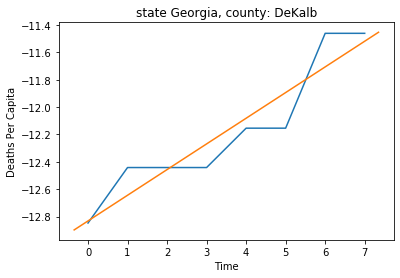

State: Georgia, county: Dougherty, slope: 0.15404042149633423, rval: 0.953043742720822


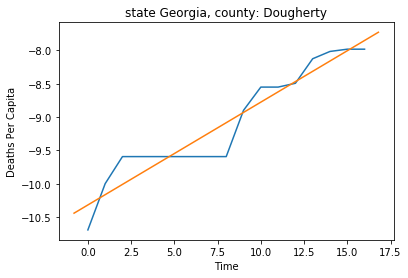

State: Georgia, county: Douglas, slope: 0.20567337515309075, rval: 0.8701075512691582


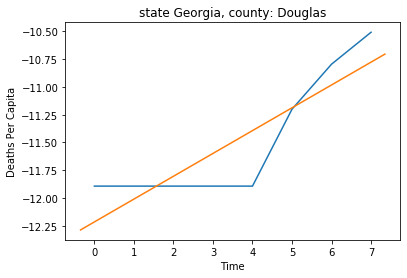

State: Georgia, county: Early, slope: 0.007135338623411203, rval: 0.19603921176392136


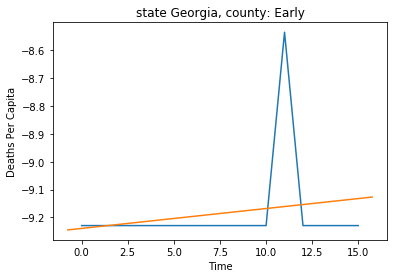

State: Georgia, county: Fayette, slope: 0.08641347403555637, rval: 0.9273044446872796


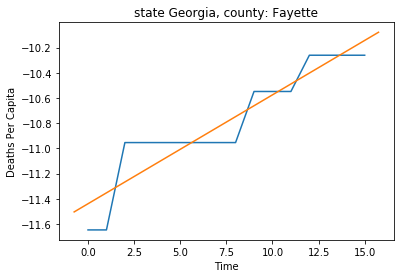

State: Georgia, county: Floyd, slope: 0.07010412861061645, rval: 0.8510334070767487


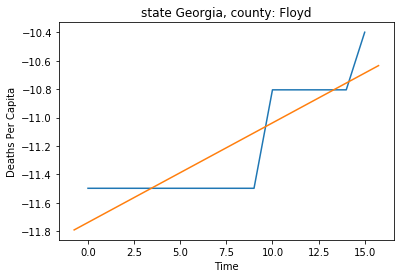

State: Georgia, county: Fulton, slope: 0.18980055975669882, rval: 0.9704537132097557


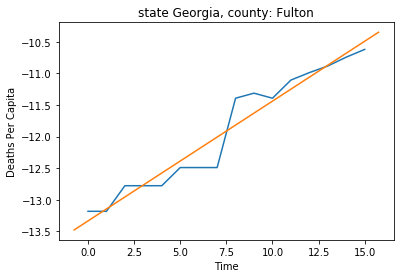

State: Georgia, county: Gordon, slope: 0.03150669002545207, rval: 0.5000000000000001


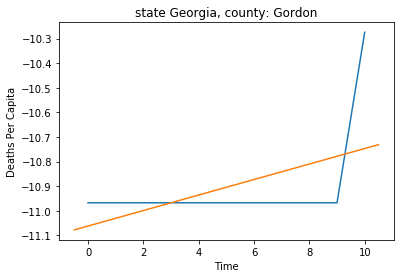

State: Georgia, county: Henry, slope: 0.08470793642260116, rval: 0.8772671674806828


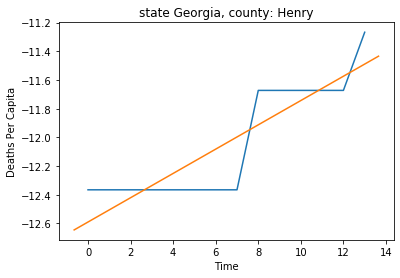

State: Georgia, county: Houston, slope: 0.29222659279309116, rval: 0.9492864430018606


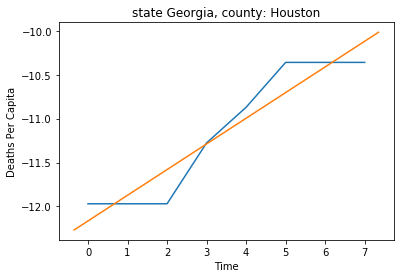

State: Georgia, county: Heard, slope: 0.0, rval: 0.0


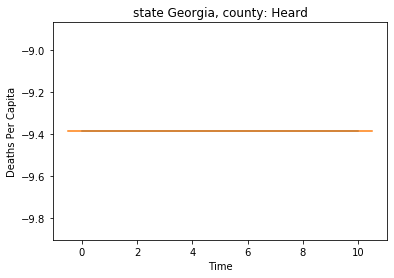

State: Georgia, county: Lee, slope: 0.253730900453609, rval: 0.8748715323880408


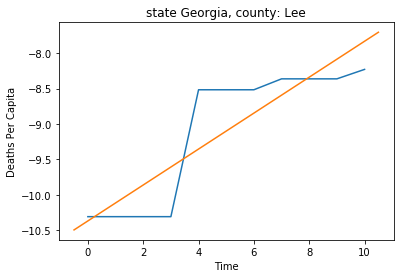

State: Georgia, county: Madison, slope: 0.0, rval: 0.0


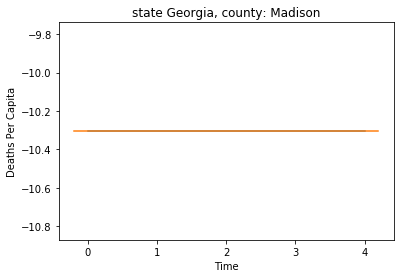

State: Georgia, county: Mitchell, slope: 0.0, rval: 0.0


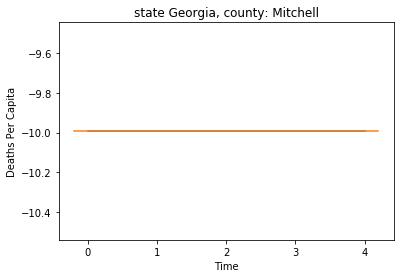

State: Arkansas, county: Cleburne, slope: 0.10094459929397723, rval: 0.8787649884942279


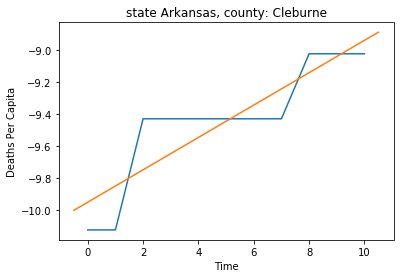

State: Arkansas, county: Conway, slope: 0.0, rval: 0.0


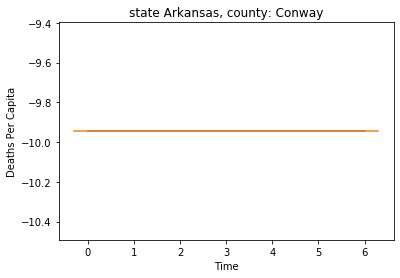

State: Georgia, county: Peach, slope: 0.0, rval: 0.0


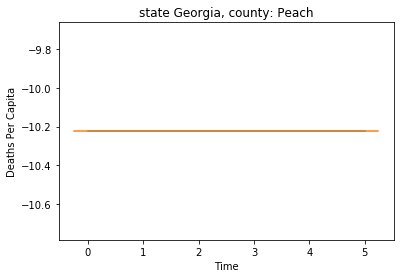

State: Georgia, county: Pickens, slope: 0.0, rval: 0.0


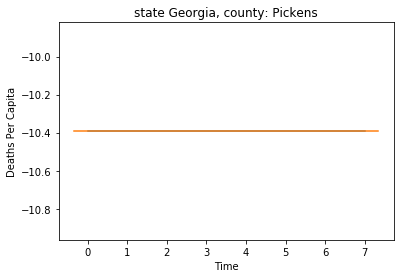

State: South Dakota, county: Beadle, slope: 0.0, rval: 0.0


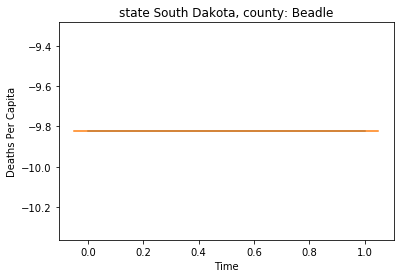

State: Georgia, county: Rockdale, slope: 0.1237762822428474, rval: 0.8451542547285167


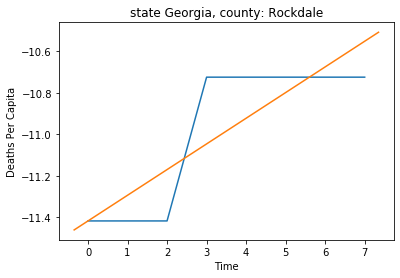

State: Georgia, county: Spalding, slope: 0.0, rval: 0.0


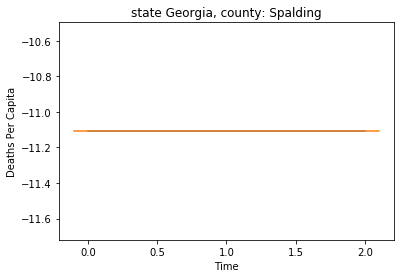

State: Georgia, county: Sumter, slope: 0.24148474174300194, rval: 0.9609600581186571


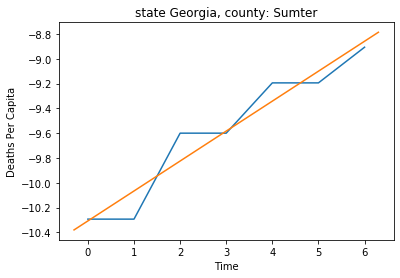

State: South Dakota, county: Davison, slope: 0.0, rval: 0.0


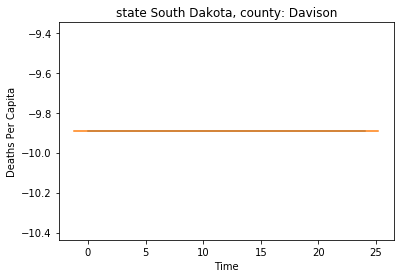

State: Georgia, county: Terrell, slope: 0.0, rval: 0.0


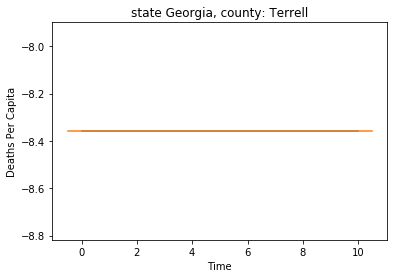

State: Georgia, county: Troup, slope: 0.0, rval: 0.0


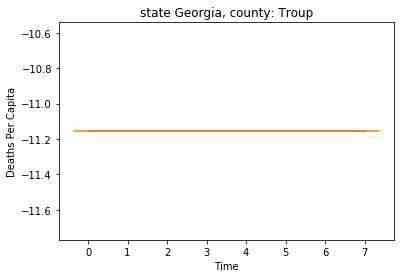

State: Arkansas, county: Pulaski, slope: 0.19315012709737228, rval: 0.9678070592576032


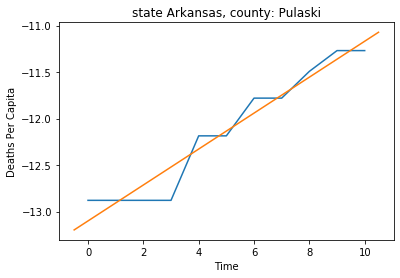

State: Georgia, county: Worth, slope: 0.0, rval: 0.0


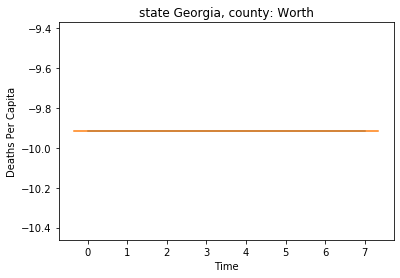

State: North Dakota, county: Morton, slope: 0.0, rval: 0.0


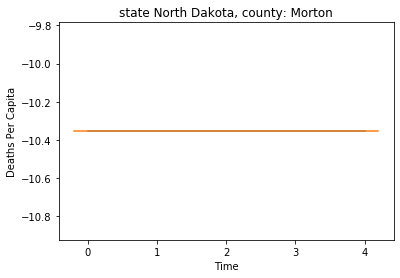

State: Montana, county: Madison, slope: 0.0, rval: 0.0


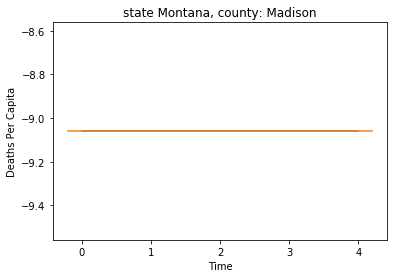

State: Louisiana, county: Acadia, slope: 0.0, rval: 0.0


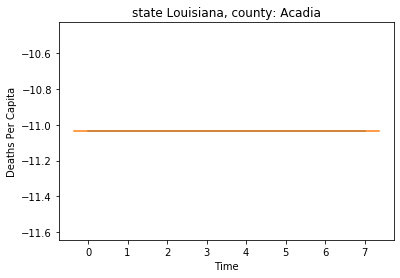

State: Louisiana, county: Allen, slope: 0.25111138026699636, rval: 0.828078671210825


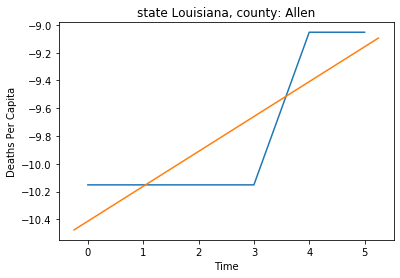

State: Louisiana, county: Ascension, slope: 0.23056215919477338, rval: 0.9141096365553918


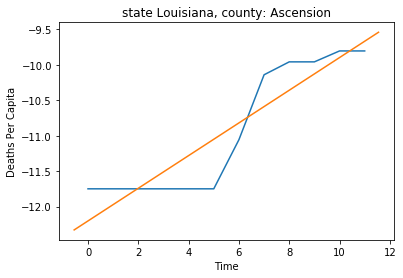

State: Louisiana, county: Avoyelles, slope: -0.3465735902799727, rval: -0.8660254037844387


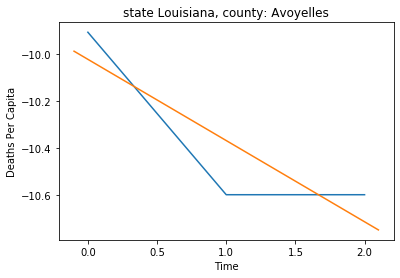

State: Louisiana, county: Bienville, slope: 0.0, rval: 0.0


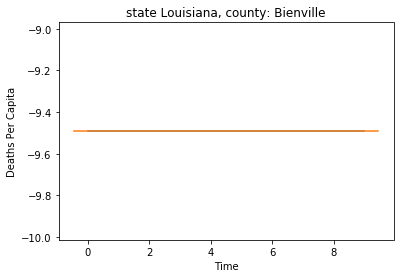

State: Louisiana, county: Bossier, slope: 0.27725887222397816, rval: 0.894427190999916


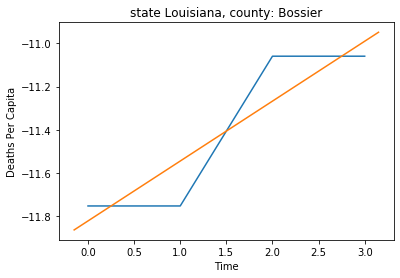

State: Louisiana, county: Caddo, slope: 0.2813442047148405, rval: 0.9516294469793088


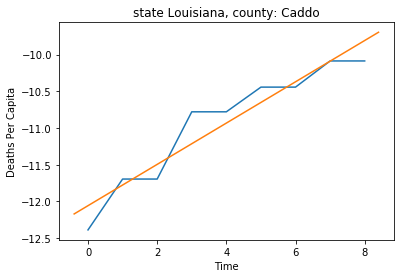

State: Louisiana, county: Catahoula, slope: 0.0, rval: 0.0


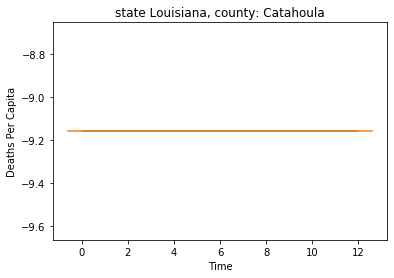

State: Louisiana, county: Claiborne, slope: 0.0, rval: 0.0


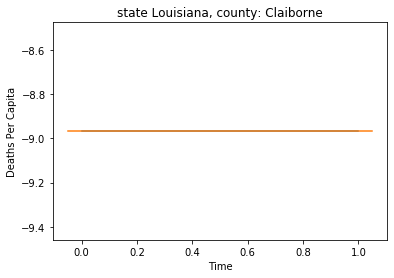

State: Louisiana, county: Iberia, slope: 0.5493061443340554, rval: 0.8660254037844387


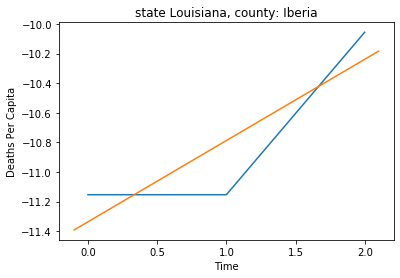

State: Louisiana, county: Iberville, slope: 0.179805233005005, rval: 0.9140231633236975


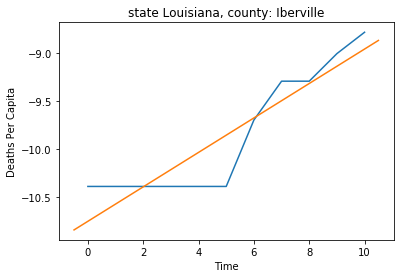

State: Louisiana, county: Jefferson, slope: 0.16163191831516485, rval: 0.7841119948699715


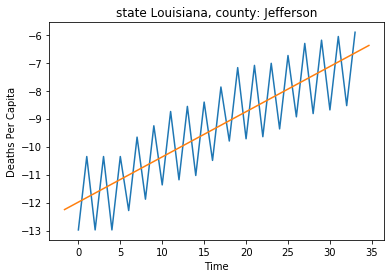

State: Louisiana, county: Lafourche, slope: 0.13974125471910281, rval: 0.8822469560281582


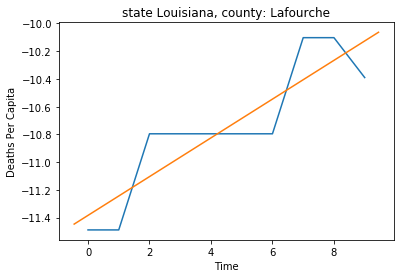

State: Louisiana, county: Orleans, slope: 0.2342811217125847, rval: 0.9831414163913385


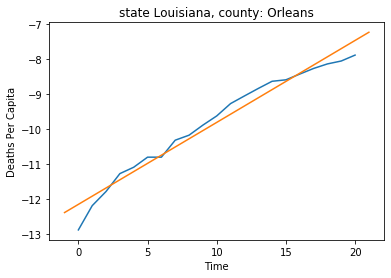

State: Louisiana, county: Plaquemines, slope: 0.10665234935881276, rval: 0.8123131234560779


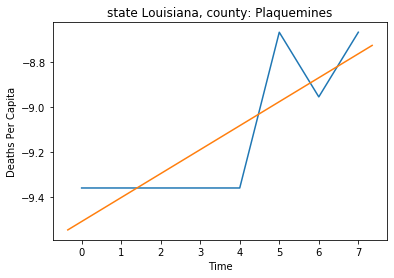

State: Louisiana, county: Rapides, slope: 0.14102751937591465, rval: 0.8229720227275766


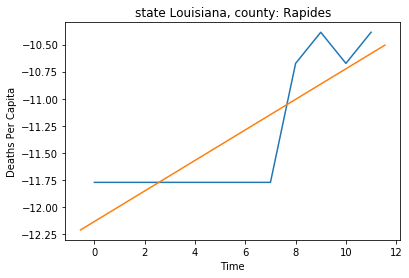

State: Louisiana, county: Terrebonne, slope: 0.05776226504666212, rval: 0.5773502691896258


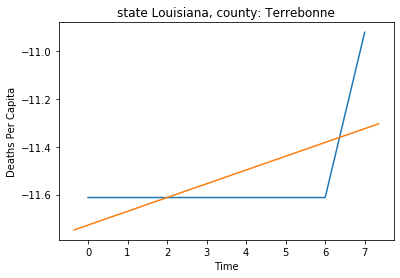

State: Louisiana, county: Washington, slope: 0.06543697159132351, rval: 0.7526178090063816


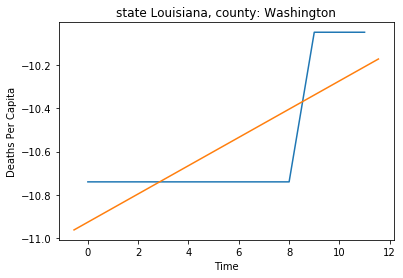

State: Louisiana, county: Webster, slope: 0.04847183080838779, rval: 0.6477502756312957


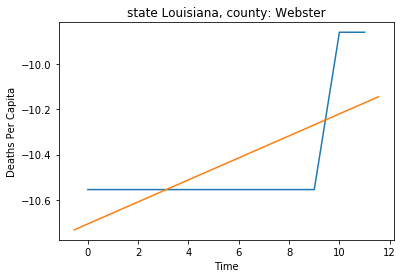

State: Wisconsin, county: Milwaukee, slope: 0.20567218554948344, rval: 0.9761652516312098


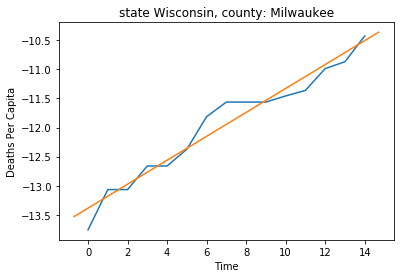

State: Wisconsin, county: Ozaukee, slope: 0.1394570829640096, rval: 0.9174772158887756


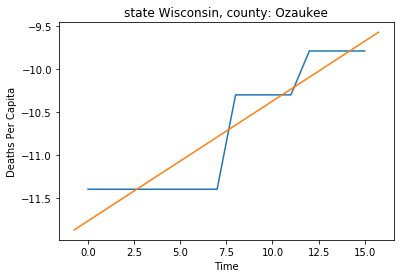

State: Wisconsin, county: Sauk, slope: 0.1237762822428474, rval: 0.8451542547285166


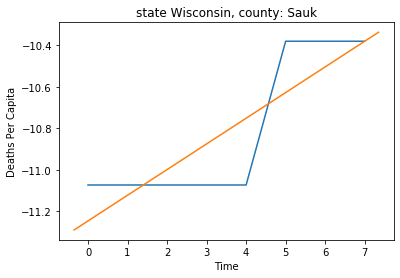

State: Wisconsin, county: Washington, slope: 0.27725887222397816, rval: 0.8944271909999159


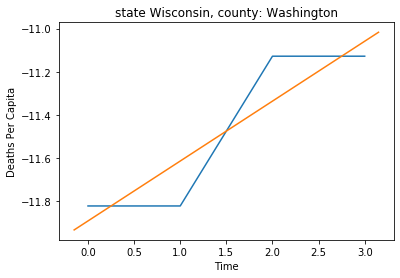

State: California, county: Madera, slope: 0.05776226504666212, rval: 0.5773502691896258


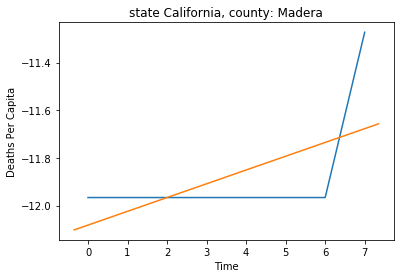

State: California, county: Marin, slope: 0.32197965565733594, rval: 0.9137981603364808


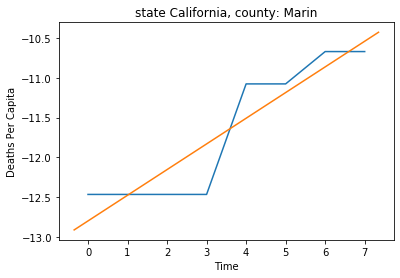

State: California, county: Mono, slope: 0.0, rval: 0.0


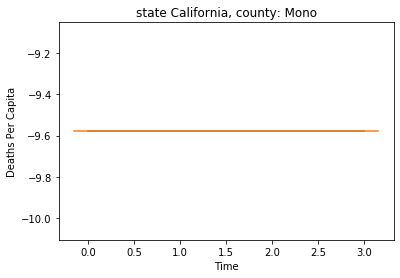

State: California, county: Napa, slope: 0.2079441541679831, rval: 0.7745966692414834


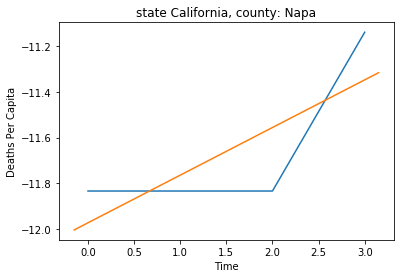

State: California, county: Nevada, slope: nan, rval: 0.0


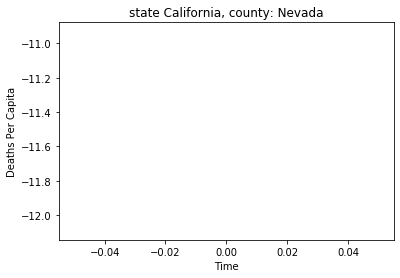

State: California, county: Shasta, slope: 0.03780802803054248, rval: 0.5222329678670935


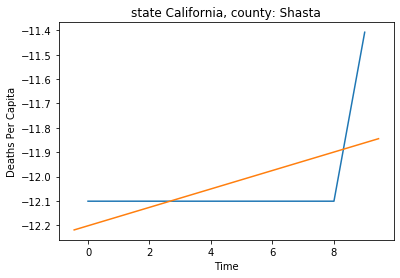

State: Tennessee, county: Franklin, slope: nan, rval: 0.0


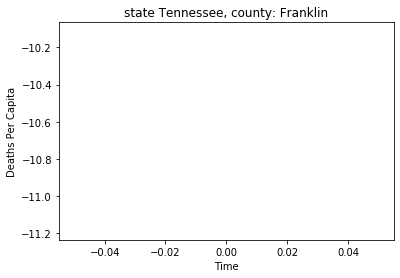

State: Tennessee, county: Greene, slope: 0.0, rval: 0.0


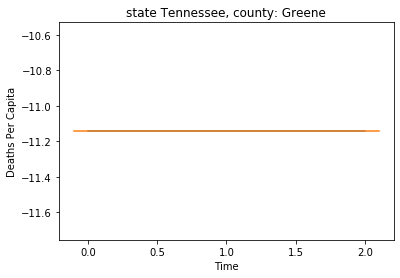

State: Tennessee, county: Marion, slope: 0.0, rval: 0.0


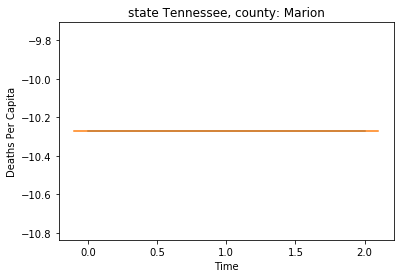

State: Tennessee, county: Sumner, slope: 0.06676569631226137, rval: 0.8660254037844386


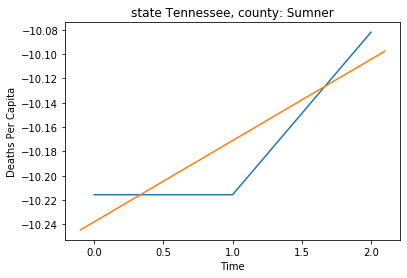

State: Tennessee, county: Williamson, slope: 0.20273255405408275, rval: 0.8660254037844387


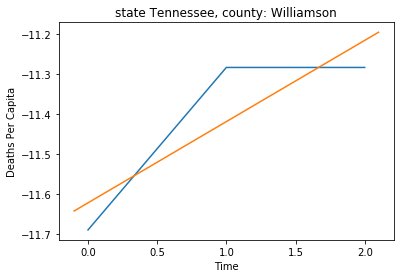

State: Ohio, county: Columbiana, slope: 0.14255553730053513, rval: 0.9127342842703862


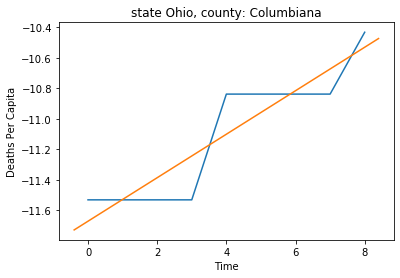

State: Ohio, county: Cuyahoga, slope: 0.20680058145924926, rval: 0.9768100558218766


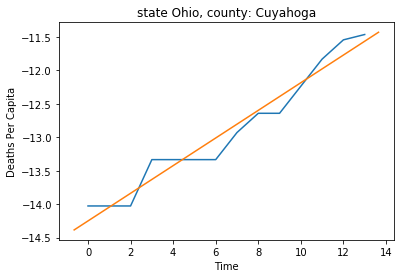

State: Ohio, county: Darke, slope: 0.0, rval: 0.0


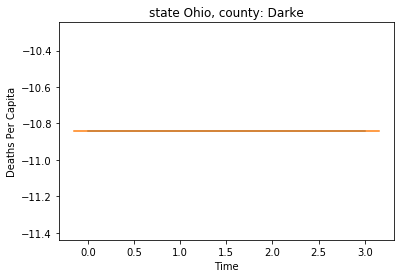

State: Ohio, county: Erie, slope: 0.0, rval: 0.0


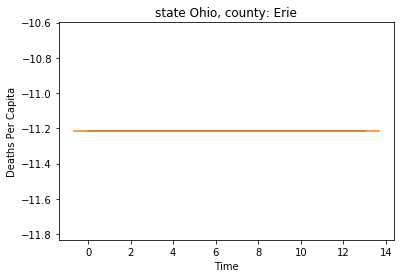

State: Ohio, county: Gallia, slope: 0.0, rval: 0.0


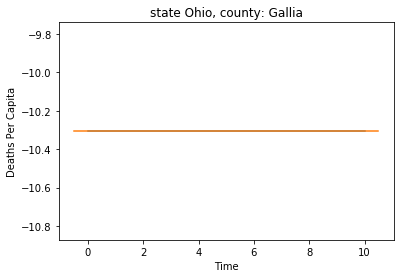

State: Ohio, county: Huron, slope: 0.0, rval: 0.0


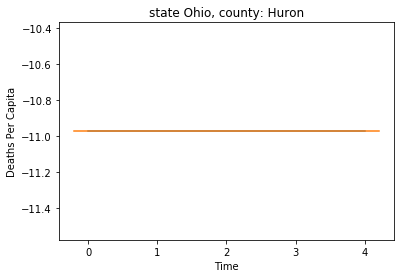

State: Ohio, county: Knox, slope: 0.0, rval: 0.0


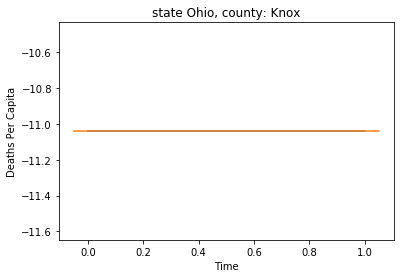

State: Ohio, county: Lake, slope: 0.18995162126496537, rval: 0.925400506487961


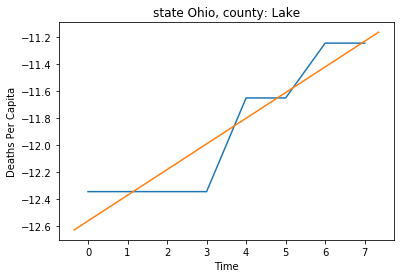

State: Ohio, county: Madison, slope: 0.0, rval: 0.0


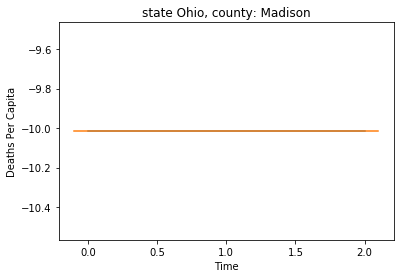

State: Ohio, county: Mahoning, slope: 0.32961373495852925, rval: 0.9598612008550937


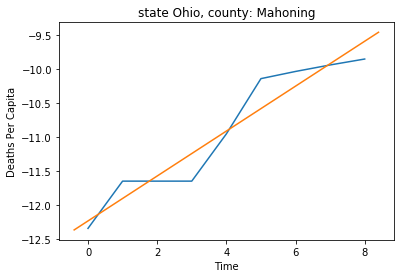

State: Ohio, county: Miami, slope: 0.1918954864716551, rval: 0.8989025674448512


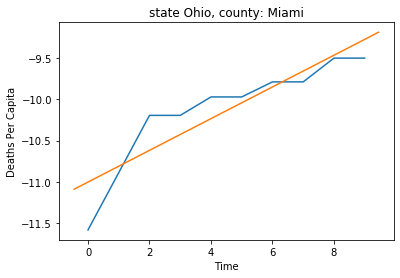

State: Ohio, county: Portage, slope: 0.2890371757896162, rval: 0.893981945085726


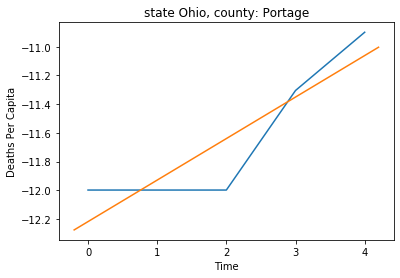

State: Ohio, county: Stark, slope: 0.10490325128541868, rval: 0.9072803614088369


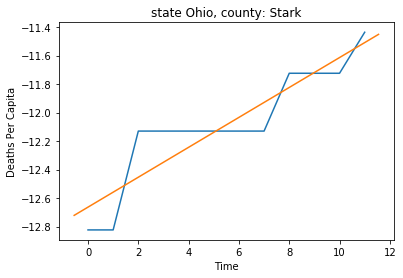

State: Ohio, county: Summit, slope: 0.11593548419346648, rval: 0.9385304821181629


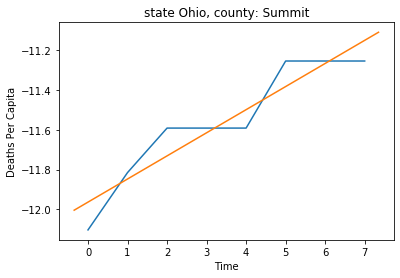

State: Ohio, county: Trumbull, slope: 0.2328308203353623, rval: 0.9384879823182185


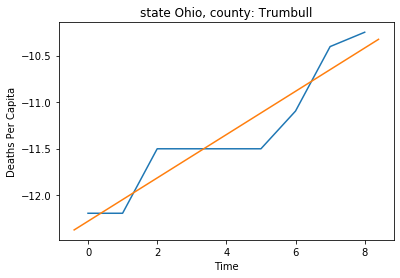

State: Nebraska, county: Buffalo, slope: 0.0, rval: 0.0


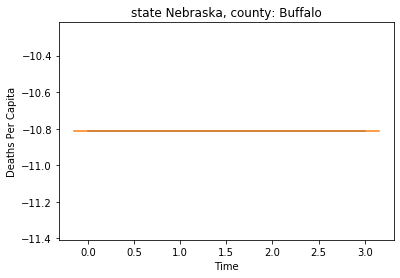

State: Nebraska, county: Lincoln, slope: 0.0, rval: 0.0


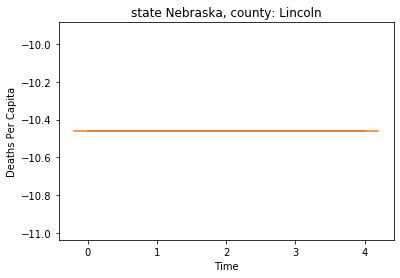

State: Nebraska, county: Madison, slope: 0.0, rval: 0.0


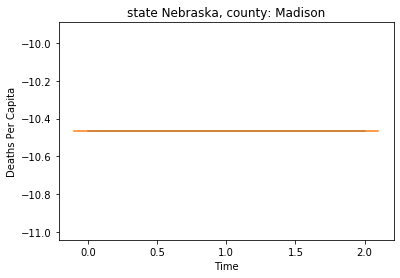

State: Maine, county: Cumberland, slope: 0.29068372382357327, rval: 0.9727097636509219


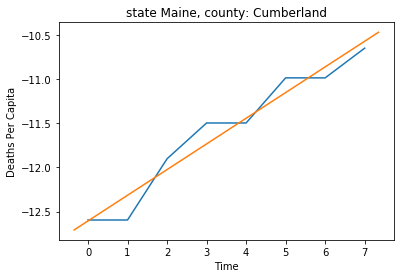

State: Texas, county: Brazos, slope: 0.17001835864536366, rval: 0.9257637328885105


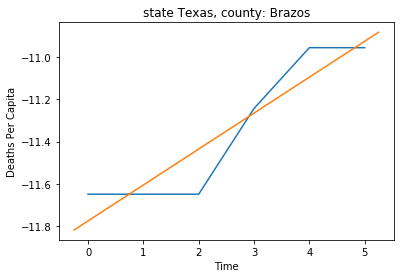

State: Texas, county: Comal, slope: 0.11552453009332424, rval: 0.8660254037844387


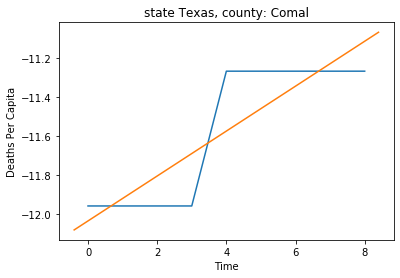

State: Oklahoma, county: Cleveland, slope: 0.18676950983438606, rval: 0.8732057155406014


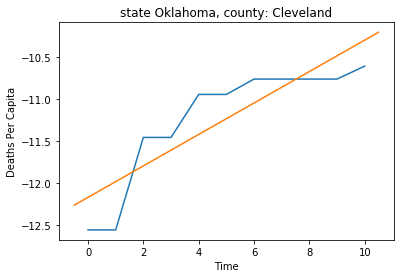

State: Texas, county: Hockley, slope: nan, rval: 0.0


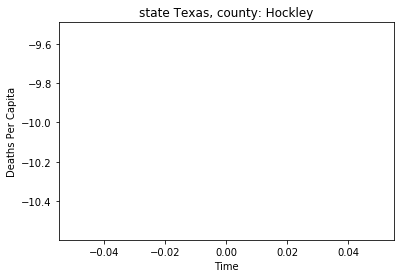

State: Oklahoma, county: Kay, slope: 0.0, rval: 0.0


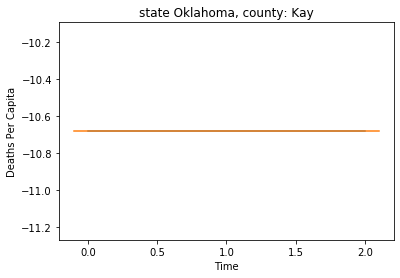

State: Oklahoma, county: Mayes, slope: 0.0, rval: 0.0


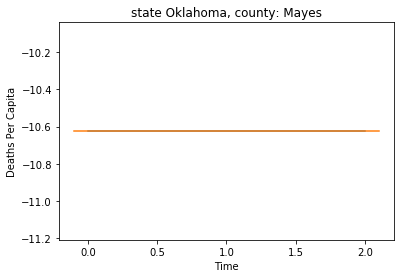

State: Oklahoma, county: Muskogee, slope: 0.27725887222397816, rval: 0.894427190999916


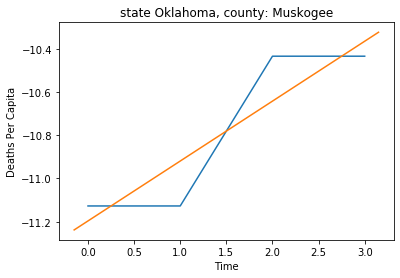

State: Oklahoma, county: Oklahoma, slope: 0.12133737546519997, rval: 0.6769577002613528


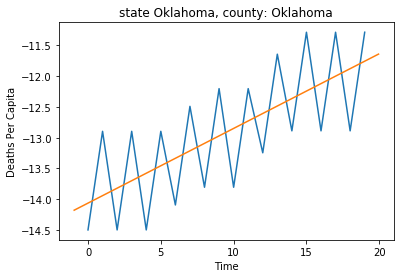

State: Oklahoma, county: Pawnee, slope: 0.0, rval: 0.0


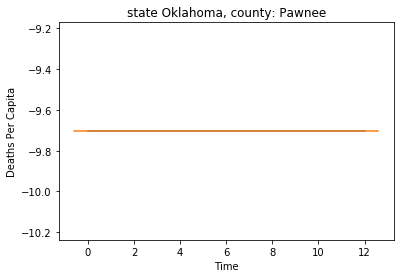

State: Texas, county: Matagorda, slope: 0.03648143055578659, rval: 0.7071067811865476


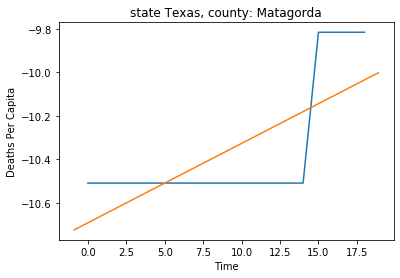

State: Oklahoma, county: Tulsa, slope: 0.13318492072091861, rval: 0.8861716783961808


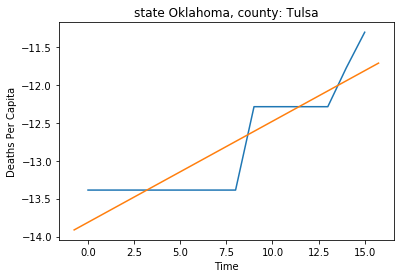

State: Oklahoma, county: Wagoner, slope: 0.14853153869141686, rval: 0.8660254037844387


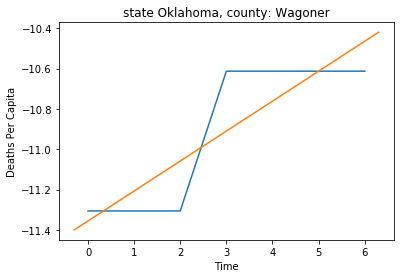

State: Texas, county: Oldham, slope: 0.0, rval: 0.0


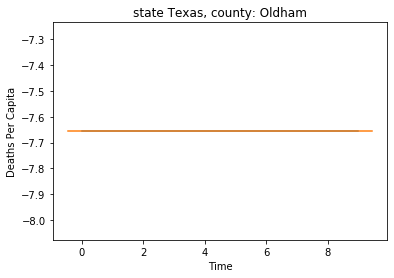

State: Nevada, county: Clark, slope: 0.2269484721272109, rval: 0.9878304523575238


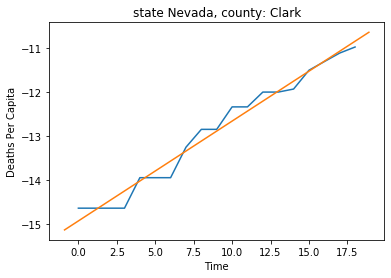

State: Texas, county: Webb, slope: 0.3624340932976363, rval: 0.9667783607608009


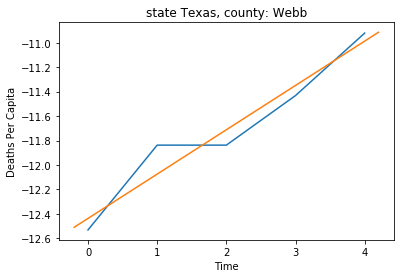

State: Maryland, county: Calvert, slope: nan, rval: 0.0


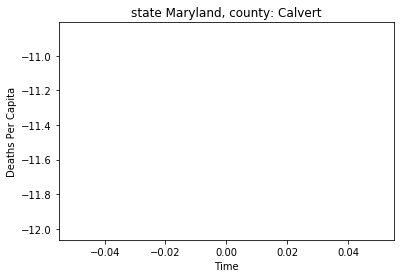

State: Maryland, county: Carroll, slope: 0.39405125803848473, rval: 0.9258187309211933


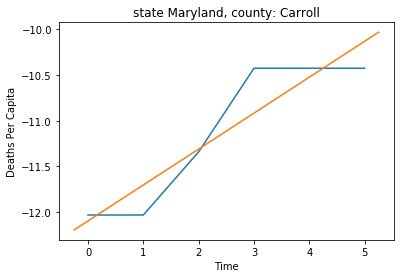

State: Idaho, county: Blaine, slope: 0.0, rval: 0.0


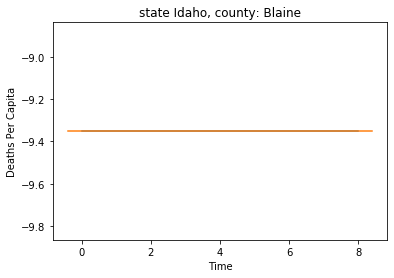

State: Idaho, county: Cassia, slope: 0.0, rval: 0.0


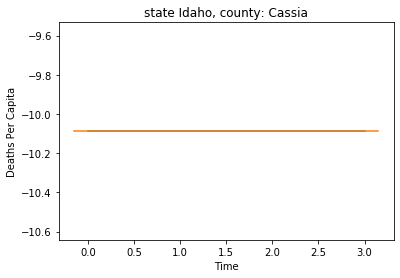

State: Colorado, county: Adams, slope: 0.46663828701560756, rval: 0.9073401973065325


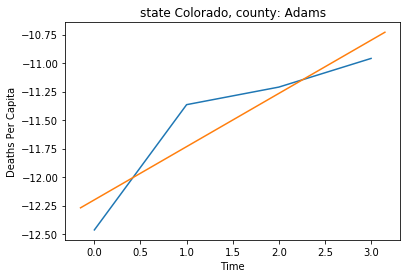

State: Colorado, county: Arapahoe, slope: 0.3674531175910726, rval: 0.9619792108392701


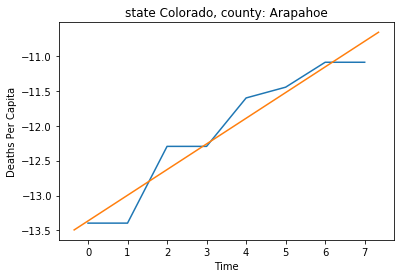

State: Colorado, county: Broomfield, slope: 0.20794415416798362, rval: 0.7745966692414834


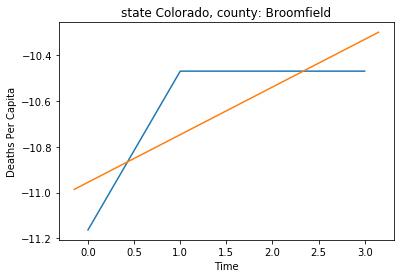

State: Colorado, county: Chaffee, slope: 0.08086717106532697, rval: 0.7245688373094719


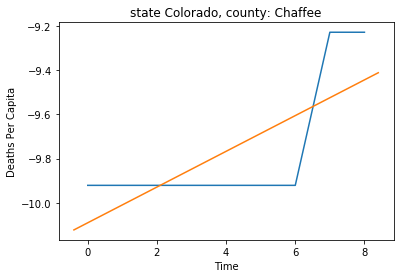

State: Colorado, county: Crowley, slope: 0.0, rval: 0.0


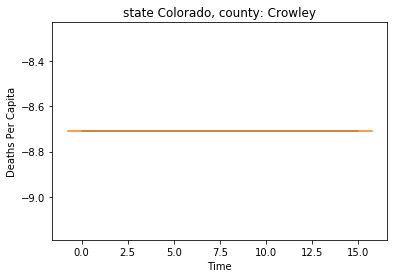

State: Colorado, county: Denver, slope: 0.17609012599486312, rval: 0.9789087860144338


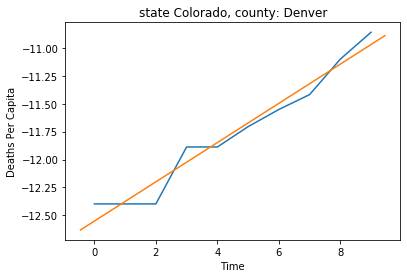

State: Colorado, county: Eagle, slope: 0.14957516734004286, rval: 0.9188950823668555


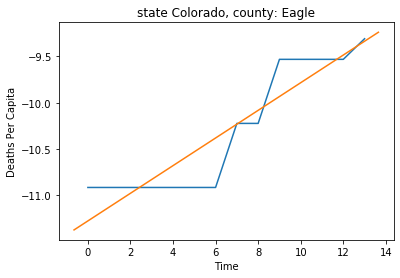

State: Colorado, county: Garfield, slope: 0.0, rval: 0.0


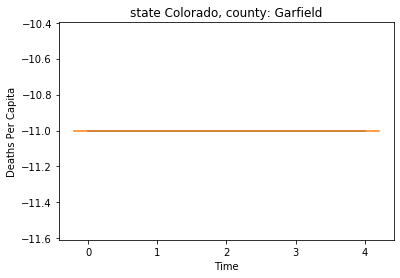

State: Colorado, county: Gunnison, slope: 0.0, rval: 0.0


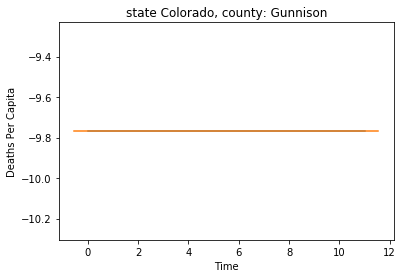

State: Colorado, county: Jefferson, slope: 0.162217160401691, rval: 0.9384281469722515


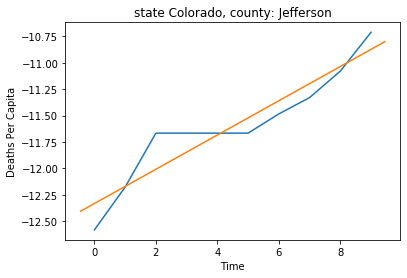

State: Colorado, county: Larimer, slope: 0.2620074954199586, rval: 0.9456878408927022


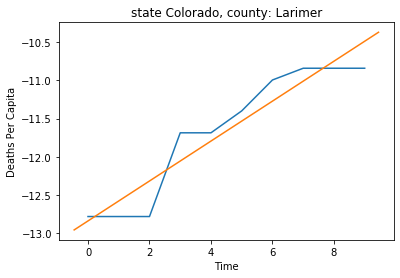

State: Colorado, county: Montrose, slope: nan, rval: 0.0


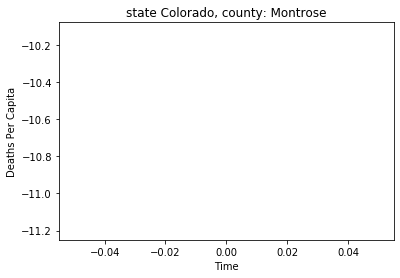

State: Colorado, county: Pitkin, slope: 0.0, rval: 0.0


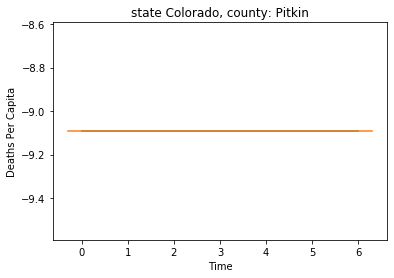

State: Colorado, county: Pueblo, slope: 0.1237762822428474, rval: 0.8451542547285167


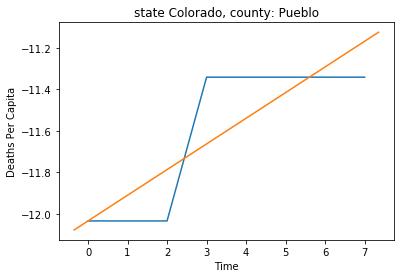

State: Colorado, county: Teller, slope: 0.0, rval: 0.0


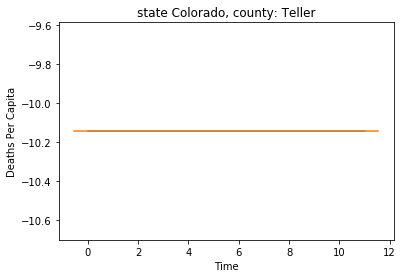

State: Colorado, county: Weld, slope: 0.1962978464697652, rval: 0.9816017261657609


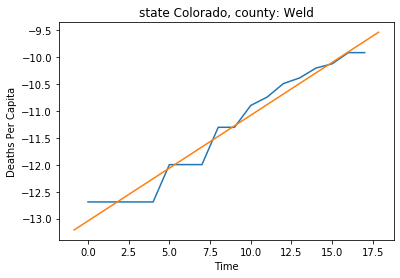

In [73]:
# Normalized by population
ct = 0
temp = None
fip_data = []

for cnty_id in ids:
    data = combined_df[combined_df["fips"]==cnty_id]
    county = list(data["county"])[-1]
    state = list(data["state"])[-1]
   
    
   
    try:
        case_data = np.array((data["cases"] / data["POPESTIMATE2019"]))
        death_data = np.array((data["deaths"] / data["POPESTIMATE2019"]))
        log_case_data = np.log(case_data)
        log_death_data = np.log(death_data)
       
        if len(death_data) > 10 and death_data[-1] > 0.00001:

            log_death_data = [x for x in log_death_data if x > -float("inf")]
            lr = linregress(range(len(log_death_data)), log_death_data)
           
            plt.title("state {}, county: {}".format(state,county))

            plt.plot(log_death_data)
            abline(lr.slope, lr.intercept)
            plt.xlabel("Time")
            plt.ylabel("Deaths Per Capita")


            print("State: {}, county: {}, slope: {}, rval: {}".format(state, county, lr.slope, lr.rvalue))

            fip_data.append((cnty_id, lr.slope, lr.rvalue))
            plt.show()
    except:
        continue



In [74]:
len(fip_data)

355

In [ ]:
len([x for x in fip_data if x[-1] > 0.80 ])

In [ ]:


fips = [x[0] for x in fip_data]
slopes = [x[1] for x in fip_data]
rvals = [x[2] for x in fip_data]

fip_dict = {"fip": fips, "slope":slopes, "rvals":rvals}


fip_data_df = pd.DataFrame.from_dict(fip_dict)

In [ ]:
fip_data_df.head()
fip_data_df.to_csv("fip_death_rates.csv")

In [ ]:
lr = linregress(range(len(test)), test)

In [ ]:
all_data = []
for x in ids[:100]:
    data = combined_df[combined_df["fips"]==x]
    
    county = list(data["county"])[-1]
    state = list(data["state"])[-1]
    case_data = list(data["cases"]/data["POPESTIMATE2019"])
    death_data = list(data["deaths"]/data["POPESTIMATE2019"])

    log_case_data = np.log(case_data)
    log_death_data = np.log(death_data)
    if log_death_data[-1] > -float("inf"):
        all_data.append(list(log_death_data))

In [ ]:
lr.rvalue

In [ ]:
plt.plot(test)
abline(0.288, -12.8)

# Examine the death rate 

In [ ]:
# Find days until death are 0.0001 of population
# after first death
combined_df["deaths_per_capita"] = combined_df["deaths"]/combined_df["POPESTIMATE2019"]
combined_df["cases_per_capita"] = combined_df["cases"]/combined_df["POPESTIMATE2019"]


In [ ]:
combined_df.head()

In [ ]:
min_death_rate = 0.0001
target_counties = list(set(combined_df[(combined_df["POPESTIMATE2019"]>100000) & (combined_df["cases_per_capita"]> min_death_rate)]["fips"]))
target_counties = [x for x in target_counties if str(x) != "nan"]

In [ ]:
def days_from1_to_target(county_fip, min_death_rate=min_death_rate):
    sub_df = combined_df[combined_df["fips"]==county_fip]
    sub_df = sub_df.sort_values(by="date")
    # since data is available every day, we can do this since there are no gaps
    target_region = sub_df[(sub_df["cases"] >= 1) & (sub_df["cases_per_capita"] < min_death_rate)]
    return len(target_region)

In [ ]:
data = []
for fip in target_counties:
    x = days_from1_to_target(fip, min_death_rate)
    data.append(x)
    print(fip,x)

In [ ]:
plt.boxplot(data)

In [ ]:
temp = [1,1,10,14,17,19,20]
grad1 = np.gradient(temp)
grad2 = np.gradient(grad1)
print(temp)
print(grad1)
print(grad2)
plt.plot(temp)
plt.plot(grad1)
plt.plot(grad2)

In [ ]:
grad2

In [ ]:
grad1

In [ ]:
def has_concavity(data):
    second_derive = np.gradient(np.gradient(data))
    for x in second_derive:
        if x < -0.1:
            return True
    return True
            

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
s = "Mutations in Fas or Fas ligand block apoptosis"

In [ ]:
tokens = nltk.word_tokenize(s)

In [ ]:
nltk.pos_tag(tokens)